# Background
A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.

The following is the story of a challenge faced by DHDL Ltd. (Name Changed), an NBFC in India. In recent times, the company is struggling to mark profits due to an increase in Loan Defaults. The company aims to determine the relative importance of each parameter with regards to their contribution as to whether a loan is going to default or not. Provided is a sample that contains the data of 90,000 + clients who have taken a loan from the company in the past with the information on whether the loan defaulted. 

The objective of this exercise is to understand which parameters play an important role in determining whether a client will default on the loan payment or not.


# Goal:
The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.


# Datasets
The problem contains two datasets, Train Data, and Test Data. Model building is to be done on Train Dataset and the Model testing is to be done on Test Dataset. The output from the Test Data is to be submitted in the Hackathon platform


# Metric to measure
Your score is the percentage of all correct predictions made by you. This is simply known as accuracy. The best accuracy is 1 whereas the worst is 0. It will be calculated as the total number of two correct predictions (True positive + True negative) divided by the total number of observations in the dataset.


# Submission File Format:
You should submit a CSV file with exactly 39933 entries plus a header row.
The file should have exactly two columns

·         ID ( sorted in any order)

·         default (contains 0 & 1, 1 represents default)


# Data Dictionary
- ID:	unique ID assigned to each applicant
- loan_amnt:	loan amount ($) applied each applicant
- loan_term:	Loan duration in years
- interest_rate:	Applicable interest rate on Loan in %
- loan_grade:	Loan Grade Assigned by the bank
- loan_subgrade:	Loan SubGrade Assigned by the bank
- job_experience:	Number of years job experience 
- home_ownership:	Status of House Ownership
- annual_income:	Annual income of the applicant
- income_verification_status:	Status of Income verification by the bank
- loan_purpose:	Purpose of loan
- state_code:	State code of the applicant's residence 
- debt_to_income:	Ratio to total debt to income (total debt might include other loan aswell)
- delinq_2yrs:	number of 30+ days delinquency in past 2 years
- public_records:	number of legal cases against the applicant
- revolving_balance:	total credit revolving balance
- total_acc:	total number of credit lines available in members credit line
- interest_receive:	total interest received by the bank on the loan
- application_type:	Whether the applicant has applied the loan by creating individuall or joint account
- last_week_pay:	How many months have the applicant paid the loan EMI already
- total_current_balance:	total current balance of all the accounts of applicant
- total_revolving_limit:	total revolving credit limit
- default:	status of loan amount, 1 = Defaulter, 0 = Non Defaulters


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:,.4f}'.format

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow import keras

# Import Training Data

In [3]:
bank = pd.read_csv("Train_set.csv")

In [4]:
df = bank.copy()

In [5]:
df.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.1700,B,B2,<5 Years,OWN,"85,000.0000",Not Verified,debt_consolidation,NC,26.6800,0.0000,0.0000,39519,20.0000,59.6000,INDIVIDUAL,4.0000,"95,493.0000","84,100.0000",0
1,14257956,18000,3 years,13.6500,C,C1,<5 Years,OWN,"64,000.0000",Verified,debt_consolidation,SC,31.6700,0.0000,1.0000,9783,24.0000,"3,348.2500",INDIVIDUAL,95.0000,"185,433.0000","13,500.0000",0
2,66216451,16000,3 years,7.2600,A,A4,<5 Years,MORTGAGE,"150,000.0000",Source Verified,debt_consolidation,TX,19.7000,2.0000,0.0000,13641,27.0000,276.6900,INDIVIDUAL,13.0000,"180,519.0000","19,300.0000",0
3,46974169,25000,3 years,13.9900,C,C4,NaN,MORTGAGE,"59,800.0000",Verified,debt_consolidation,MO,37.3900,0.0000,0.0000,35020,35.0000,"1,106.7200",INDIVIDUAL,17.0000,"183,208.0000","55,400.0000",0
4,46725961,17000,3 years,6.3900,A,A2,10+ years,MORTGAGE,"72,000.0000",Source Verified,credit_card,TX,8.9200,0.0000,0.0000,23990,26.0000,725.2900,INDIVIDUAL,39.0000,"23,990.0000","81,300.0000",0


In [6]:
df.shape

(93174, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [8]:
missing_val = pd.DataFrame(data = df.isnull().sum(), columns = ["No_missing_values"])
missing_val["%"] = np.round(missing_val["No_missing_values"] / df.shape[0] * 100,3)
missing_val[missing_val["No_missing_values"] > 0]   # 8 columns have missing values. the ratio of missing values are all below 10%.

,No_missing_values,%
job_experience,4702,5.0460
annual_income,1,0.0010
delinq_2yrs,2,0.0020
public_records,2,0.0020
total_acc,2,0.0020
last_week_pay,1924,2.0650
total_current_balance,7386,7.9270
total_revolving_limit,7386,7.9270


In [9]:
np.any(df.duplicated())   # no duplicates

False

In [10]:
df.nunique()  # ID is distinct for each customer, which should be dropped

ID                            93174
loan_amnt                      1310
loan_term                         2
interest_rate                   481
loan_grade                        7
loan_subgrade                    35
job_experience                    3
home_ownership                    5
annual_income                  8667
income_verification_status        3
loan_purpose                      4
state_code                       50
debt_to_income                 3996
delinq_2yrs                      22
public_records                   15
revolving_balance             35945
total_acc                       102
interest_receive              69122
application_type                  2
last_week_pay                    90
total_current_balance         72306
total_revolving_limit          4469
default                           2
dtype: int64

In [11]:
df = df.drop(columns = ["ID"])  # drop ID column

In [12]:
# take a look at unique values at categorical columns 
for col in df.select_dtypes(include = "object"):
    print(df[col].value_counts())
    print()

3 years    65211
5 years    27963
Name: loan_term, dtype: int64

B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: loan_grade, dtype: int64

B3    5879
B4    5879
C2    5479
C1    5443
C3    5270
C4    5182
B2    5169
B5    5095
B1    4843
A5    4723
C5    4413
D1    3716
A4    3631
D2    3239
D3    2759
D4    2717
A3    2450
A1    2377
A2    2353
D5    2284
E1    1924
E2    1736
E3    1513
E4    1228
E5     977
F1     745
F2     545
F3     465
F4     355
F5     234
G1     174
G2     146
G3     105
G5      66
G4      60
Name: loan_subgrade, dtype: int64

<5 Years      40610
10+ years     30362
6-10 years    17500
Name: job_experience, dtype: int64

MORTGAGE    46445
RENT        37449
OWN          9254
OTHER          18
NONE            8
Name: home_ownership, dtype: int64

Source Verified    34487
Verified           30450
Not Verified       28237
Name: income_verification_status, dtype: int64

debt_consolidation    55241
credit_card           21571
other

- Each `loan_grade` includes 5 `loan_subgrade`.
- Column `income_verification_status`, "Source Verified" and "Verified" may need to be merged.

In [13]:
df.describe(include = "object").T   # for categorical columns

,count,unique,top,freq
loan_term,93174,2,3 years,65211
loan_grade,93174,7,B,26865
loan_subgrade,93174,35,B3,5879
job_experience,88472,3,<5 Years,40610
home_ownership,93174,5,MORTGAGE,46445
income_verification_status,93174,3,Source Verified,34487
loan_purpose,93174,4,debt_consolidation,55241
state_code,93174,50,CA,13744
application_type,93174,2,INDIVIDUAL,93118


In [14]:
df.describe().T # for numerical columns

,count,mean,std,min,25%,50%,75%,max
loan_amnt,"93,174.0000","14,733.8614","8,428.1849",500.0000,"8,000.0000","13,000.0000","20,000.0000","35,000.0000"
interest_rate,"93,174.0000",13.2334,4.3687,5.3200,9.9900,12.9900,16.2000,28.9900
annual_income,"93,173.0000","75,028.2586","69,454.7840","1,200.0000","45,000.0000","64,000.0000","90,000.0000","9,500,000.0000"
debt_to_income,"93,174.0000",18.1276,8.5631,0.0000,11.9300,17.6400,23.8900,672.5200
delinq_2yrs,"93,172.0000",0.3170,0.8809,0.0000,0.0000,0.0000,0.0000,22.0000
public_records,"93,172.0000",0.1961,0.5812,0.0000,0.0000,0.0000,0.0000,49.0000
revolving_balance,"93,174.0000","16,854.4685","23,689.0739",0.0000,"6,433.0000","11,856.0000","20,745.0000","2,560,703.0000"
total_acc,"93,172.0000",25.2489,11.8551,1.0000,17.0000,24.0000,32.0000,119.0000
interest_receive,"93,174.0000","1,747.2635","2,088.2361",0.0000,439.8800,"1,070.7550","2,219.6125","23,172.3100"
last_week_pay,"91,250.0000",58.1549,44.3266,0.0000,22.0000,48.0000,83.0000,291.0000


- Magnitudes of columns vary significantly, may need to rescaling.
- All predictors are right-skewed, indicating outliers on the right end.

# Import Test Data

In [15]:
import_test = pd.read_csv("Test_set.csv")

In [187]:
test_X = import_test.copy()

In [75]:
test_X.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.3100,C,C2,<5 Years,MORTGAGE,"73,400.0000",Not Verified,debt_consolidation,CA,14.6200,0.0000,0.0000,22156,30.0000,"2,290.2400",INDIVIDUAL,87.0000,"128,098.0000","25,800.0000"
1,66862420,12000,3 years,7.2600,A,A4,10+ years,MORTGAGE,"105,000.0000",Not Verified,credit_card,VA,11.3800,0.0000,0.0000,7592,14.0000,202.6800,INDIVIDUAL,13.0000,"269,396.0000","23,600.0000"
2,3637416,15000,3 years,14.3300,C,C1,6-10 years,MORTGAGE,"50,000.0000",Verified,debt_consolidation,TX,28.1500,0.0000,1.0000,17983,19.0000,"1,166.2400",INDIVIDUAL,30.0000,"220,135.0000","34,100.0000"
3,53682249,12000,3 years,9.9900,B,B3,6-10 years,RENT,"37,000.0000",Source Verified,credit_card,NJ,34.3200,0.0000,0.0000,12262,18.0000,635.0600,INDIVIDUAL,35.0000,"39,436.0000","21,700.0000"
4,53937165,20150,3 years,11.5300,B,B5,<5 Years,RENT,"75,000.0000",Source Verified,debt_consolidation,CA,26.7400,1.0000,0.0000,8251,11.0000,"1,232.8400",INDIVIDUAL,31.0000,"52,764.0000","12,000.0000"


In [76]:
test_X.shape

(39933, 22)

In [77]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39933 non-null  int64  
 1   loan_amnt                   39933 non-null  int64  
 2   loan_term                   39933 non-null  object 
 3   interest_rate               39933 non-null  float64
 4   loan_grade                  39933 non-null  object 
 5   loan_subgrade               39933 non-null  object 
 6   job_experience              37844 non-null  object 
 7   home_ownership              39933 non-null  object 
 8   annual_income               39933 non-null  float64
 9   income_verification_status  39933 non-null  object 
 10  loan_purpose                39933 non-null  object 
 11  state_code                  39933 non-null  object 
 12  debt_to_income              39933 non-null  float64
 13  delinq_2yrs                 399

In [78]:
test_X.isnull().sum().sort_values(ascending = False)   # 7 columns with missing values

total_revolving_limit         3230
total_current_balance         3230
job_experience                2089
last_week_pay                  806
total_acc                        1
public_records                   1
delinq_2yrs                      1
debt_to_income                   0
application_type                 0
interest_receive                 0
revolving_balance                0
ID                               0
loan_amnt                        0
loan_purpose                     0
income_verification_status       0
annual_income                    0
home_ownership                   0
loan_subgrade                    0
loan_grade                       0
interest_rate                    0
loan_term                        0
state_code                       0
dtype: int64

In [21]:
np.any(test_X.duplicated())   # no duplicates

False

In [23]:
for col in test_X.select_dtypes(include = "object"):
    print(test_X[col].value_counts())
    print()

3 years    28110
5 years    11823
Name: loan_term, dtype: int64

B    11551
C    10948
A     6764
D     6237
E     3158
F     1030
G      245
Name: loan_grade, dtype: int64

B3    2547
B4    2519
C1    2436
C2    2371
B5    2247
C3    2220
B2    2206
C4    2084
A5    2069
B1    2032
C5    1837
D1    1576
A4    1559
D2    1373
D3    1175
D4    1141
A3    1074
A1    1067
A2     995
D5     972
E1     803
E2     755
E3     652
E4     519
E5     429
F1     312
F2     254
F3     195
F4     147
F5     122
G2      72
G1      71
G3      46
G5      31
G4      25
Name: loan_subgrade, dtype: int64

<5 Years      17290
10+ years     13146
6-10 years     7408
Name: job_experience, dtype: int64

MORTGAGE    20008
RENT        15938
OWN          3979
OTHER           6
NONE            2
Name: home_ownership, dtype: int64

Source Verified    14780
Verified           13195
Not Verified       11958
Name: income_verification_status, dtype: int64

debt_consolidation    23473
credit_card            9383
other

In [24]:
output = pd.DataFrame(index = test_X ["ID"])   # output dataframe
output.head()

""
ID
4855329
66862420
3637416
53682249
53937165


In [188]:
test_X = test_X.drop(columns = ["ID"])   # drop ID column

In [80]:
test_X.describe(include = "object").T

,count,unique,top,freq
loan_term,39933,2,3 years,28110
loan_grade,39933,7,B,11551
loan_subgrade,39933,35,B3,2547
job_experience,37844,3,<5 Years,17290
home_ownership,39933,5,MORTGAGE,20008
income_verification_status,39933,3,Source Verified,14780
loan_purpose,39933,4,debt_consolidation,23473
state_code,39933,50,CA,5931
application_type,39933,2,INDIVIDUAL,39909


In [81]:
test_X.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,"39,933.0000","14,781.9873","8,427.8454",500.0000,"8,000.0000","13,000.0000","20,000.0000","35,000.0000"
interest_rate,"39,933.0000",13.2193,4.3921,5.3200,9.9900,12.9900,16.2000,28.9900
annual_income,"39,933.0000","75,264.8003","56,556.6644","3,300.0000","45,262.0000","65,000.0000","90,000.0000","5,000,000.0000"
debt_to_income,"39,933.0000",18.1211,8.4880,0.0000,11.9600,17.6100,23.8800,380.5300
delinq_2yrs,"39,932.0000",0.3123,0.8545,0.0000,0.0000,0.0000,0.0000,17.0000
public_records,"39,932.0000",0.1915,0.5578,0.0000,0.0000,0.0000,0.0000,23.0000
revolving_balance,"39,933.0000","17,019.2811","26,129.7448",0.0000,"6,482.0000","11,949.0000","20,928.0000","2,568,995.0000"
total_acc,"39,932.0000",25.2648,11.7685,1.0000,17.0000,24.0000,32.0000,114.0000
interest_receive,"39,933.0000","1,764.7439","2,095.4434",0.0000,441.4700,"1,077.7200","2,260.9900","21,811.2900"
last_week_pay,"39,127.0000",58.4182,44.4761,0.0000,22.0000,48.0000,83.0000,278.0000


# EDA
## Univariate Analysis

In [30]:
def hist_box_plot(col):
    plt.figure(figsize = (20,6))
    plt.subplot(121)
    sns.histplot(x = col, data = df, kde = True);
    plt.subplot(122)
    sns.boxplot(x = col, data = df, color = "orange", showmeans = True);
    
def countplot(col, figsize):
    plt.figure(figsize = figsize)
    ax = sns.countplot(x = col, data = df);
    for p in ax.patches:
        perc = str(np.round(p.get_height() / df.shape[0] * 100, 2)) + "%"
        plt.annotate(perc, (p.get_x() + p.get_width() / 2 - 0.1, p.get_y() + p.get_height())) 

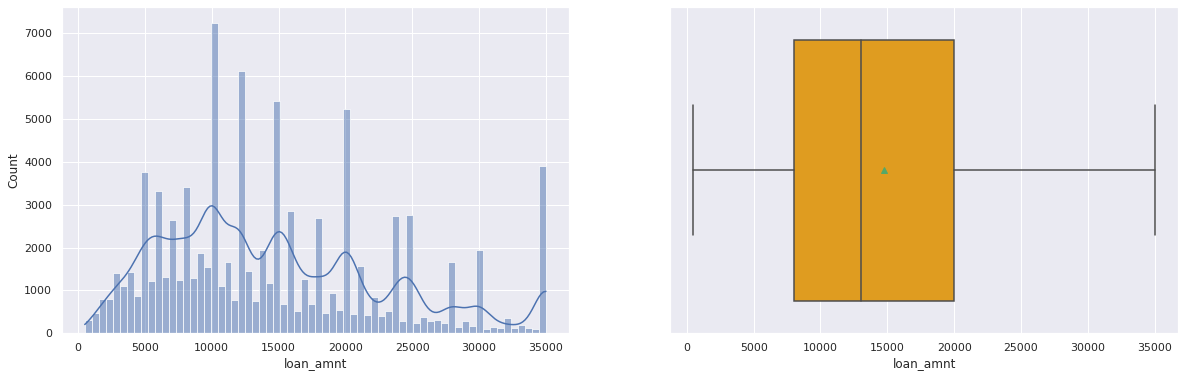

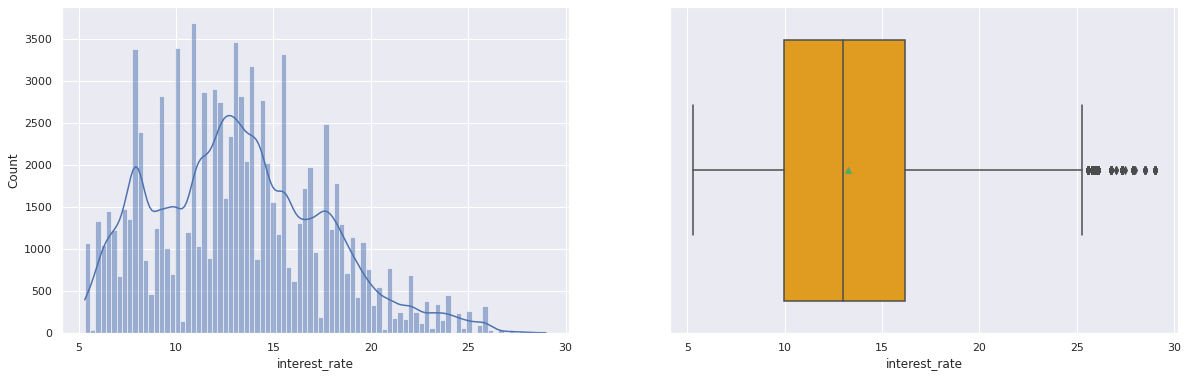

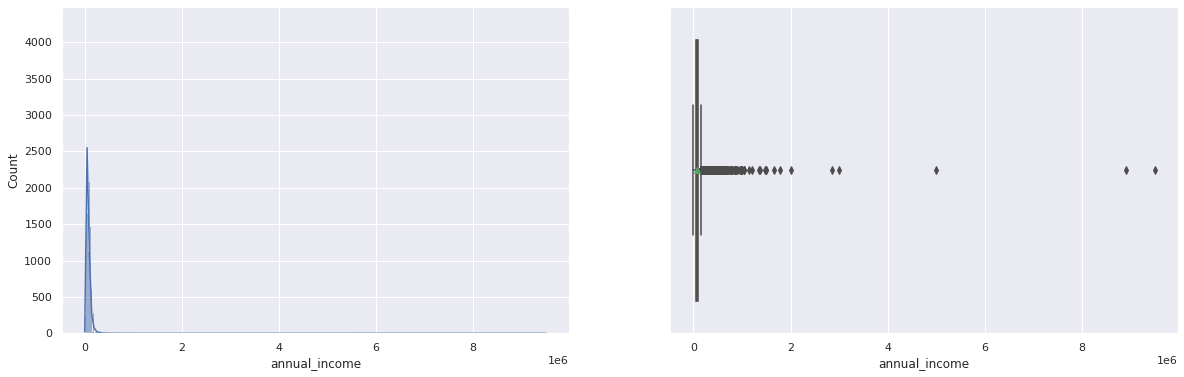

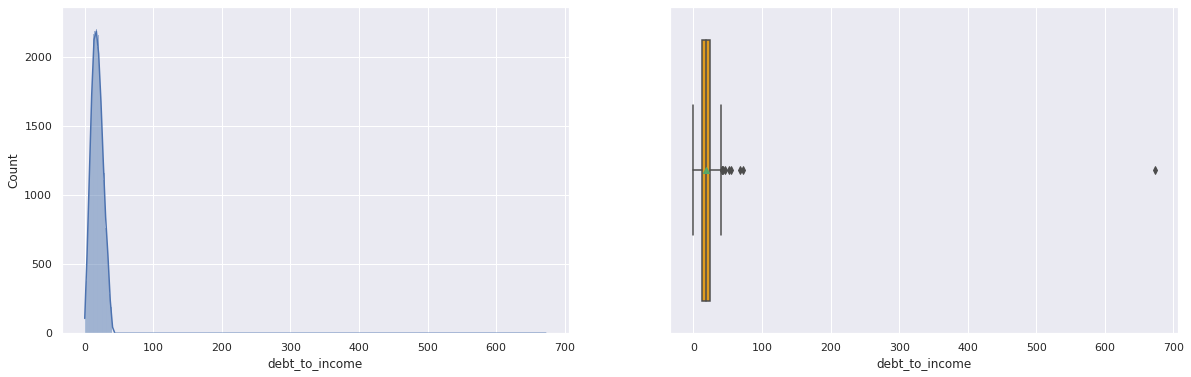

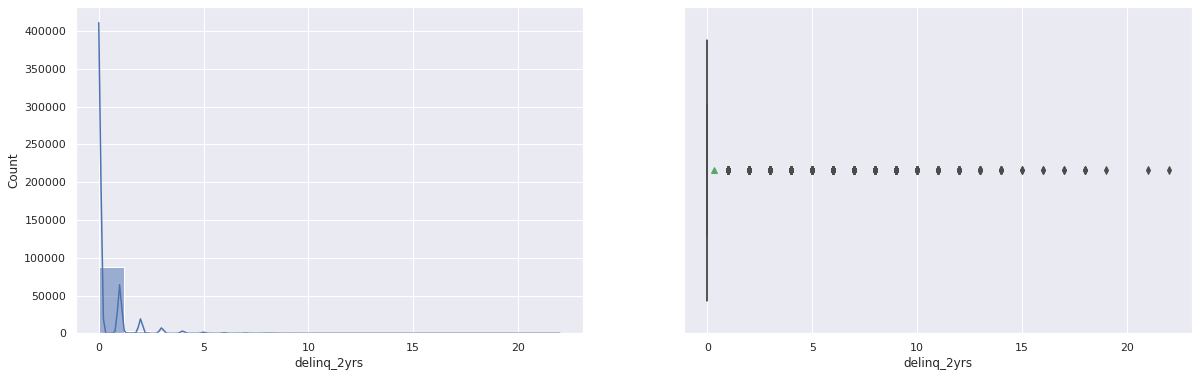

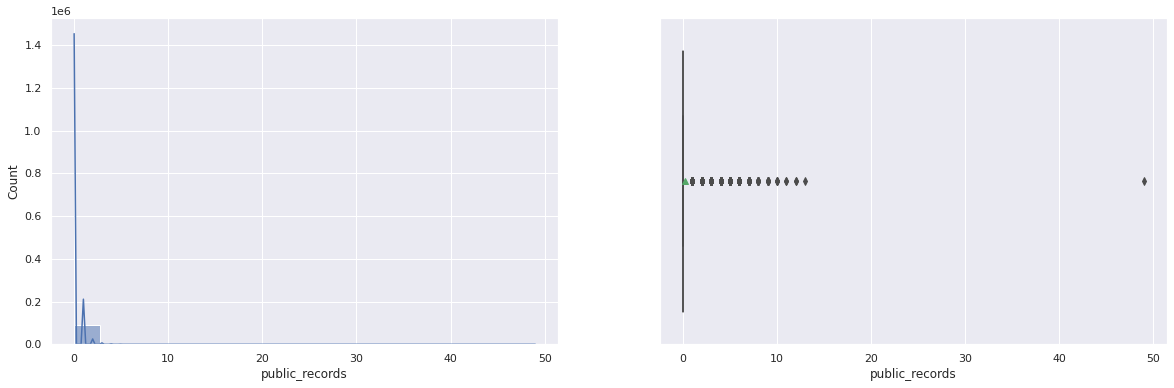

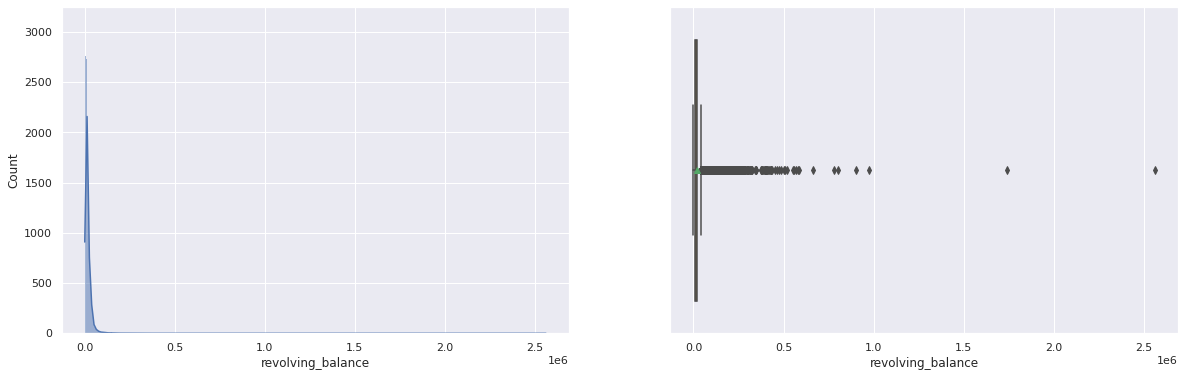

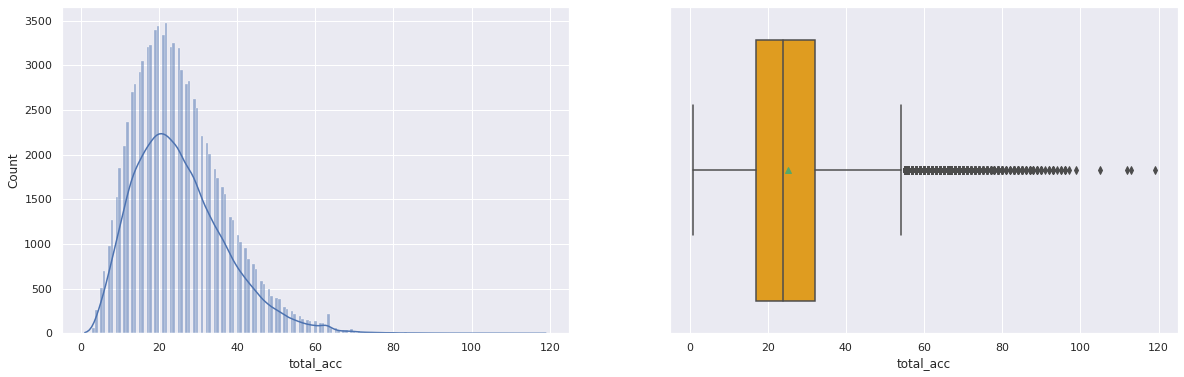

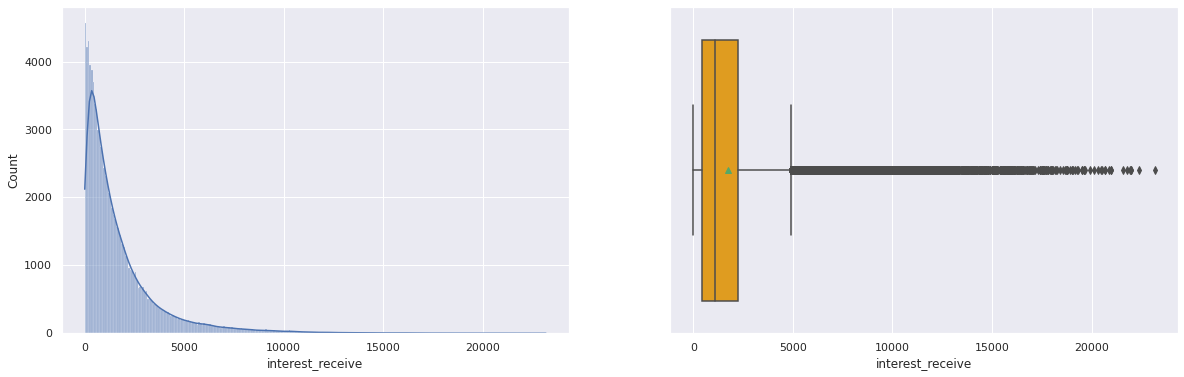

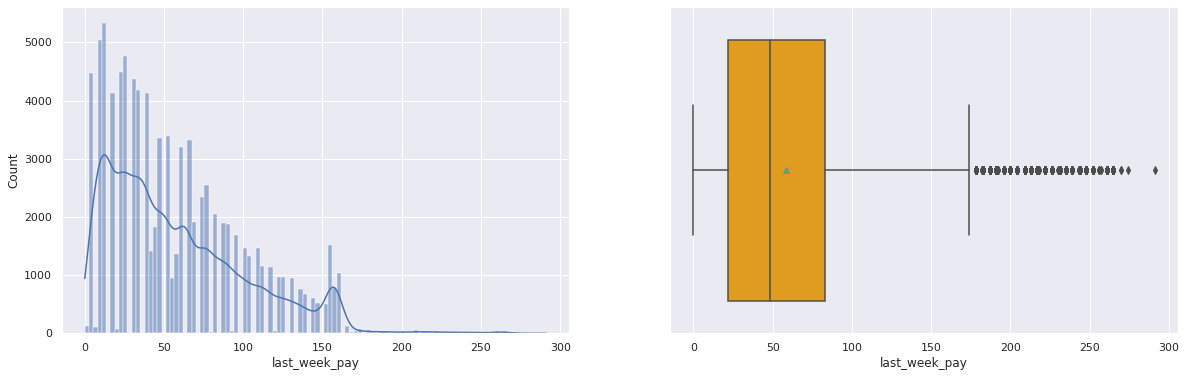

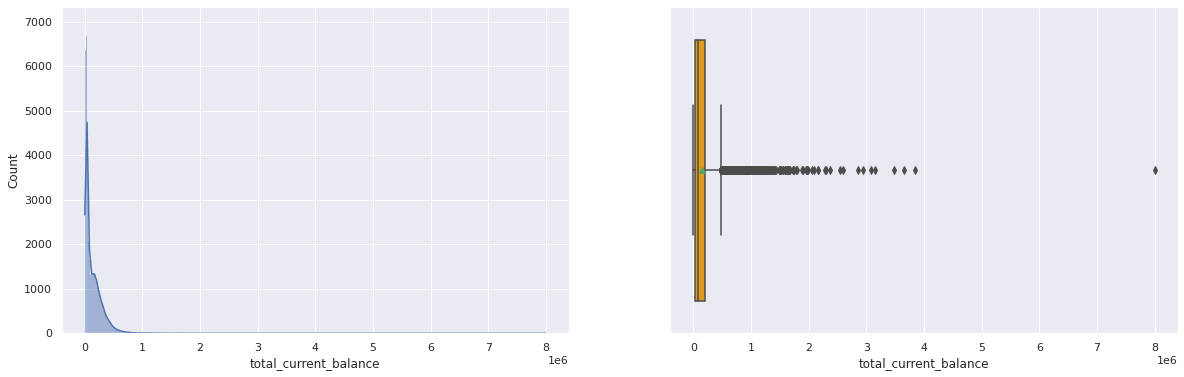

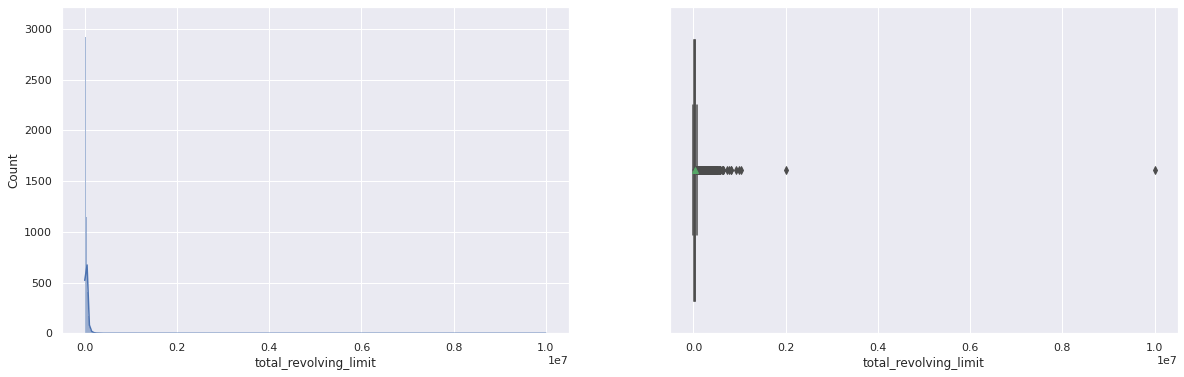

In [31]:
num_cols = list(df.select_dtypes(include = "number").columns)

# exclude columns: default
num_cols.remove("default")

for col in num_cols:
    hist_box_plot(col)   # plot histogram and boxplot for numerical columns

- `annual_income`, `debt_to_income`, `delinq_2yrs`, `public_records`, `revolving_balance`, `total_current_balance`, `total_revolving_limit` are very skewed.
- Almost all the numerical columns have a number of outliers on the right.

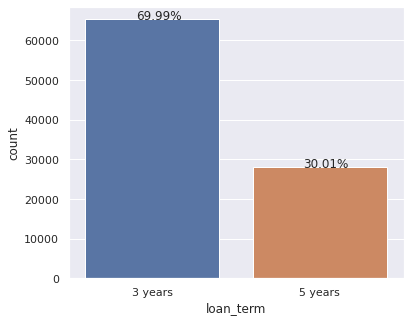

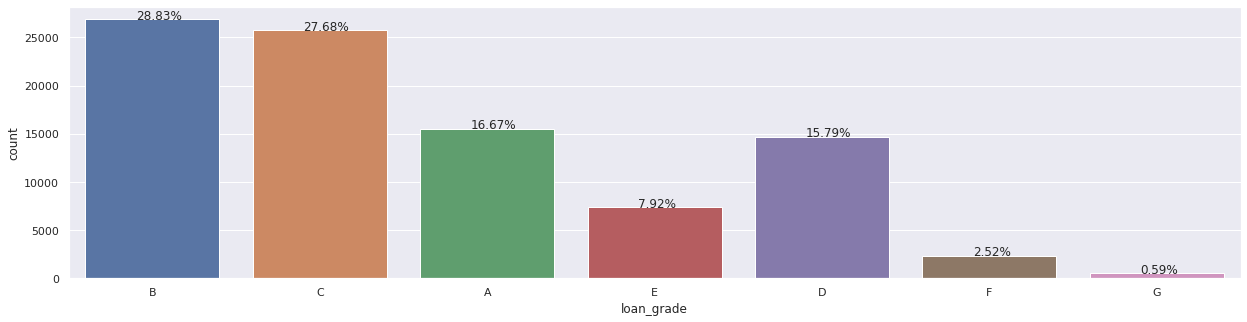

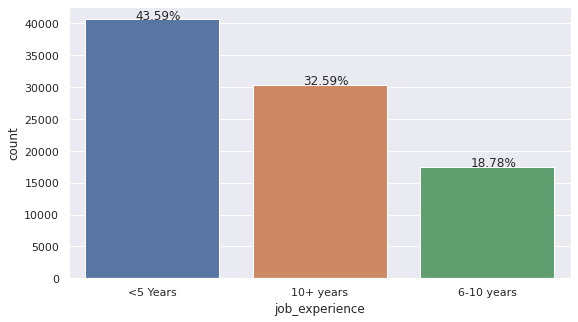

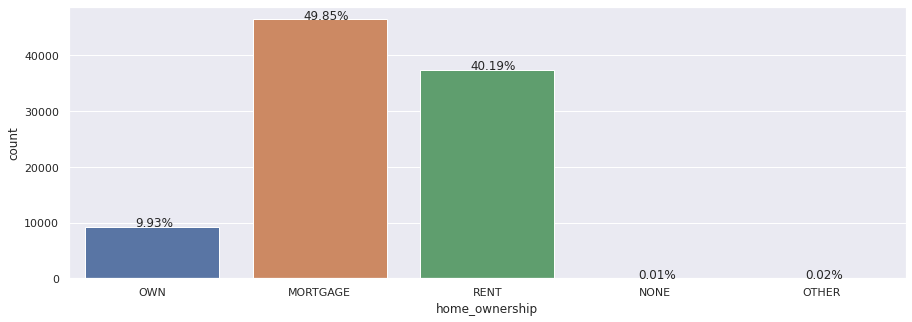

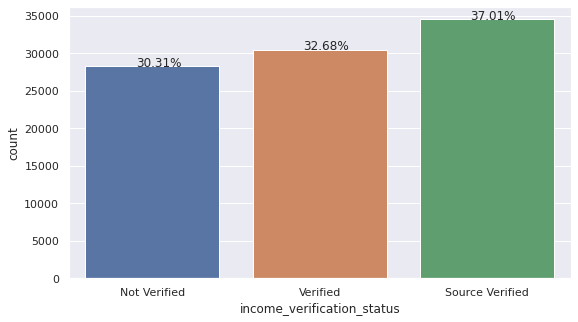

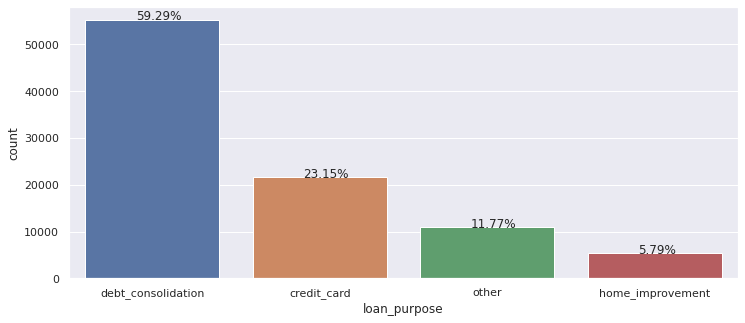

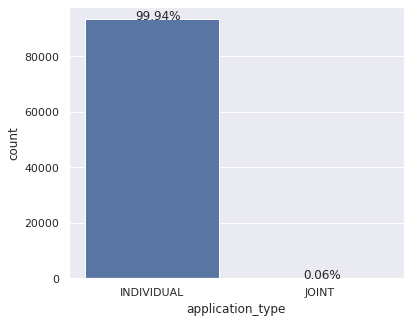

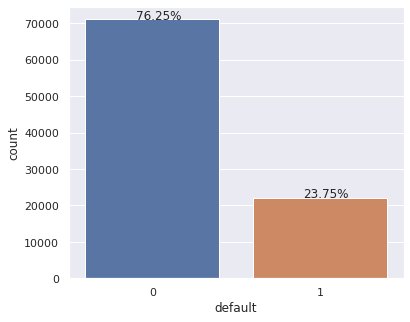

In [32]:
cat_cols = list(df.select_dtypes(include = "object").columns) + ["default"]

# exclude columns: loan_subgrade, state_code
cat_cols.remove("loan_subgrade")
cat_cols.remove("state_code")

for col in cat_cols:
    width = df[col].nunique()
    countplot(col, (width * 3, 5))     # plot countplot for categorical columns

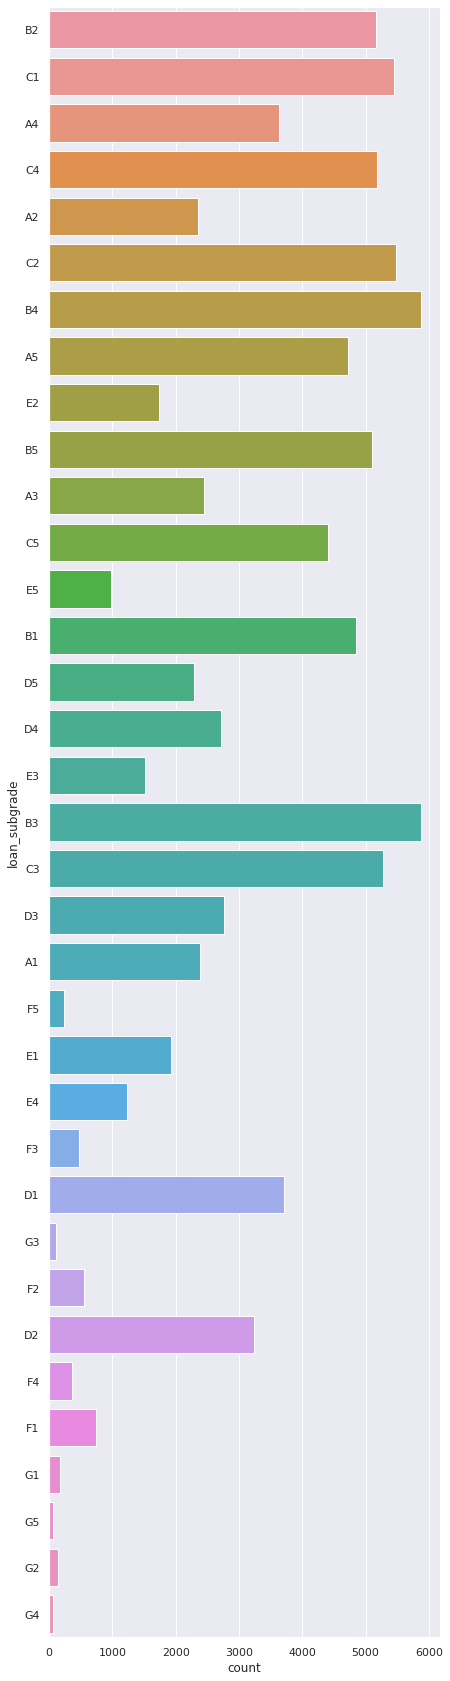

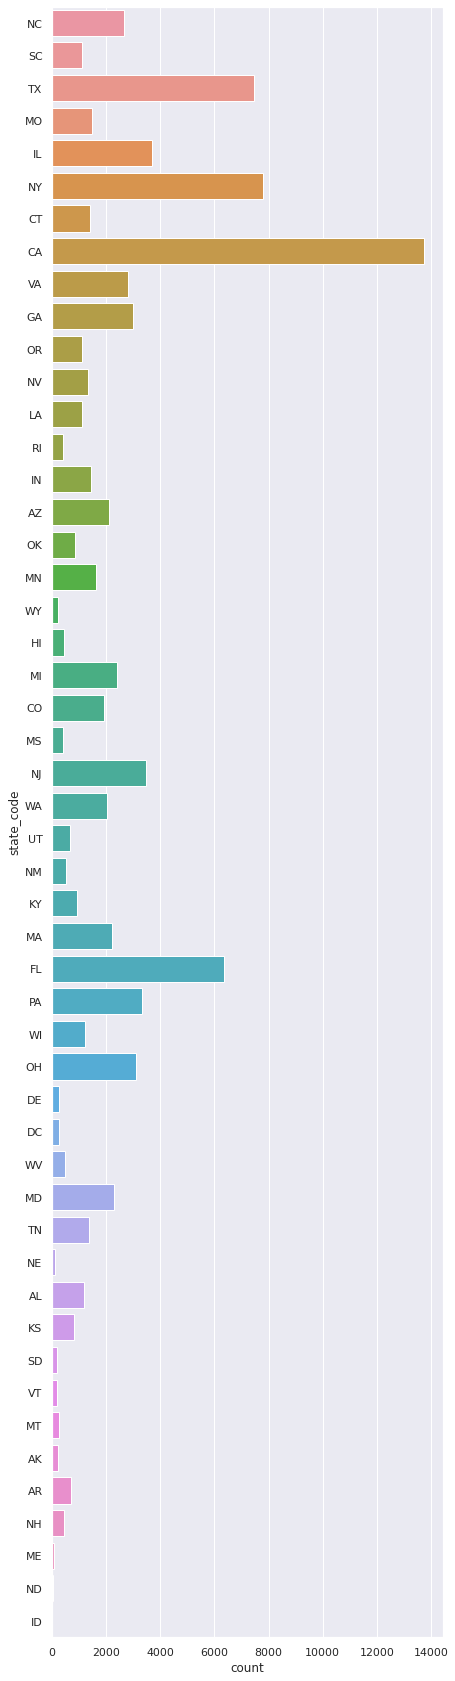

In [33]:
cat_cols = ["loan_subgrade", "state_code"]
for col in cat_cols:
    plt.figure(figsize = (7,30))
    sns.countplot(y = col, data = df);

## Bivariate Analysis

### Heatmap

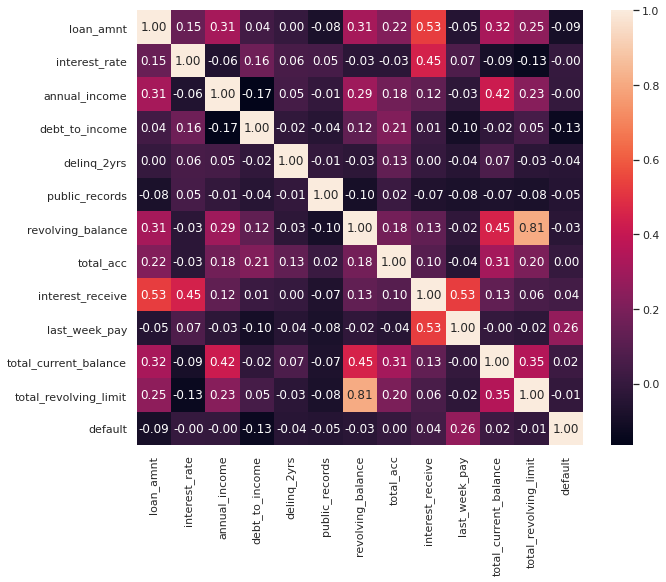

In [17]:
plt.figure(figsize = (10,8));
sns.heatmap(data = df.corr(), annot = True, fmt = "0.2f");

- Positive correlation: 
    - `interest_receive` and `loan_amount`
    - `interest_receive` and `interest_rate`
    - `total_current_balance` and `annual_income`
    - `total_current_balance` and `revolving_balance`
    - `total_revolving_limit` and `revolving_balance`
    - `last_week_pay` and `interest_receive`

### PairPlot

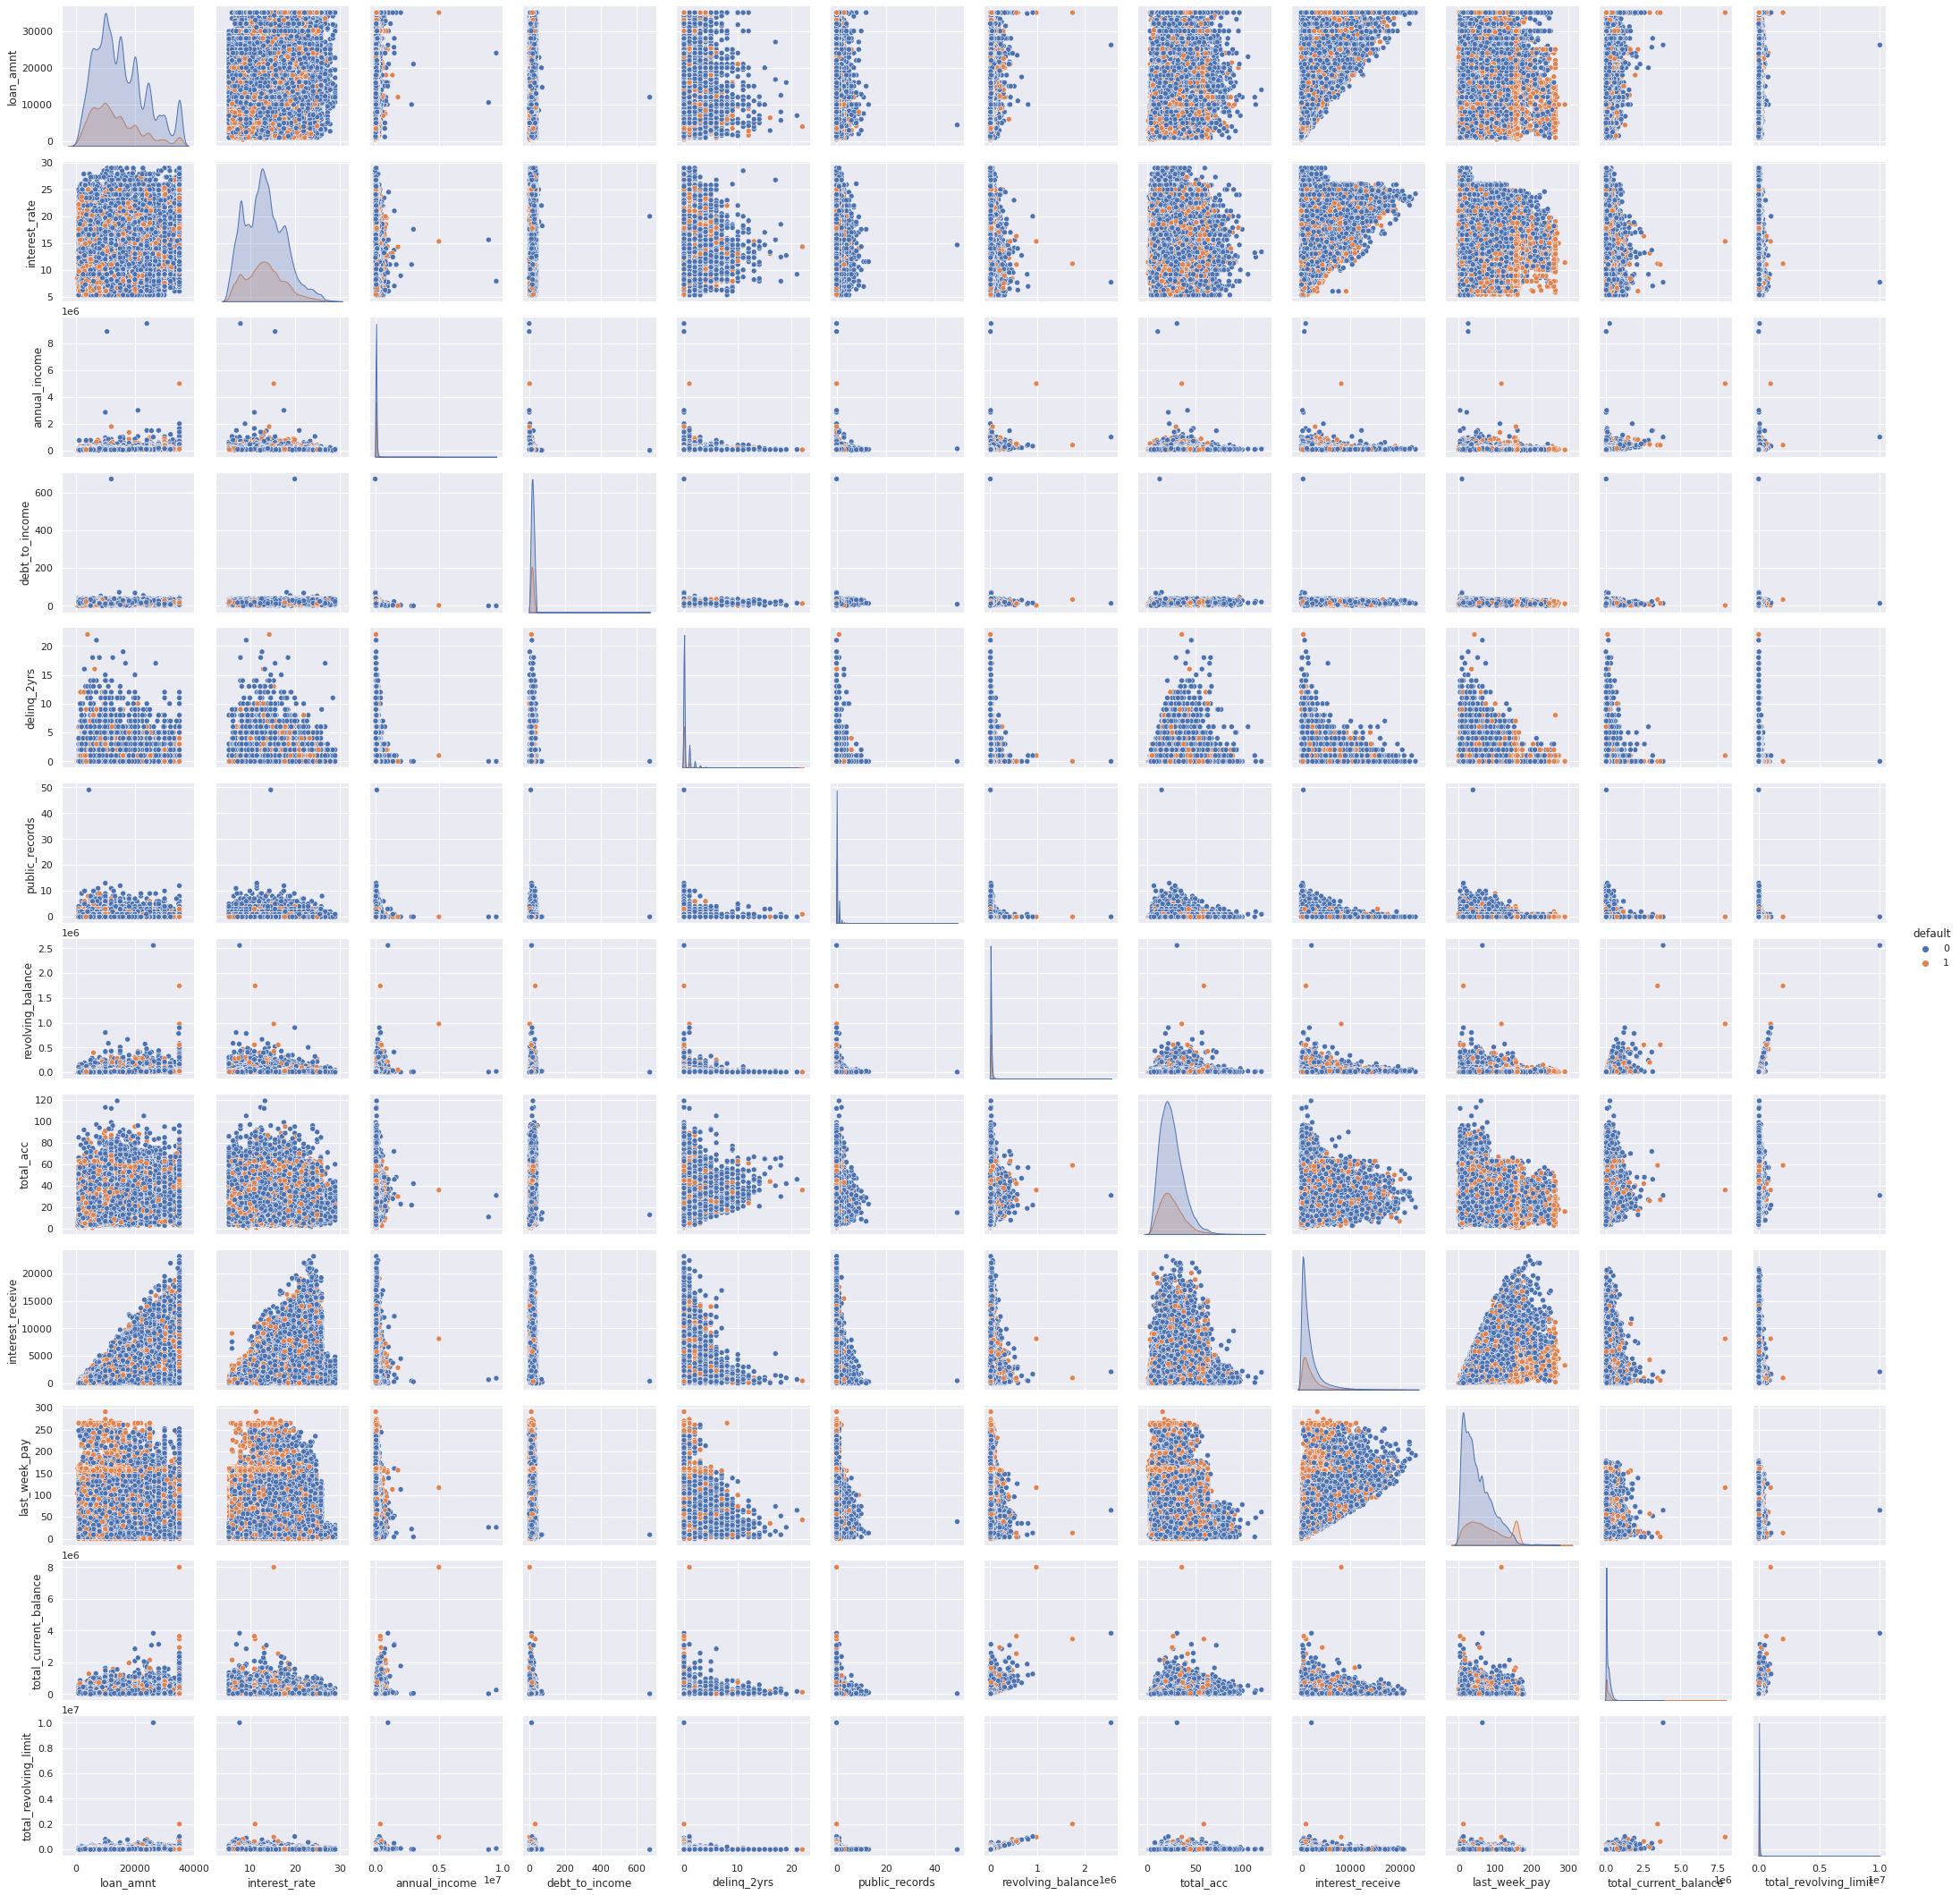

In [18]:
sns.pairplot(data = df, diag_kind = "kde", hue = "default");

### default vs loan_term

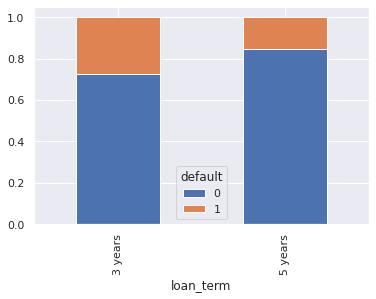

In [20]:
pd.crosstab(index = df["loan_term"], columns = df["default"], normalize = "index").plot(kind = "bar", stacked = True);

- 3 year term loan applicants are more likely to default.

### default vs loan_grade

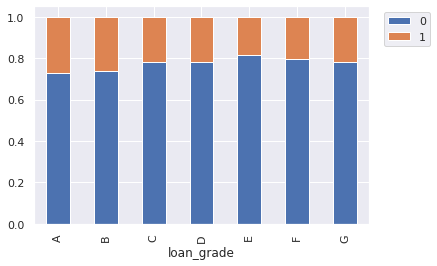

In [27]:
pd.crosstab(index = df["loan_grade"], columns = df["default"], normalize = "index").plot(kind = "bar", stacked = True);
plt.legend(bbox_to_anchor = (1.2,1), loc = "upper right");

- Likelihood of default: A = B > C = D > F = G > E.

### default vs loan_subgrade

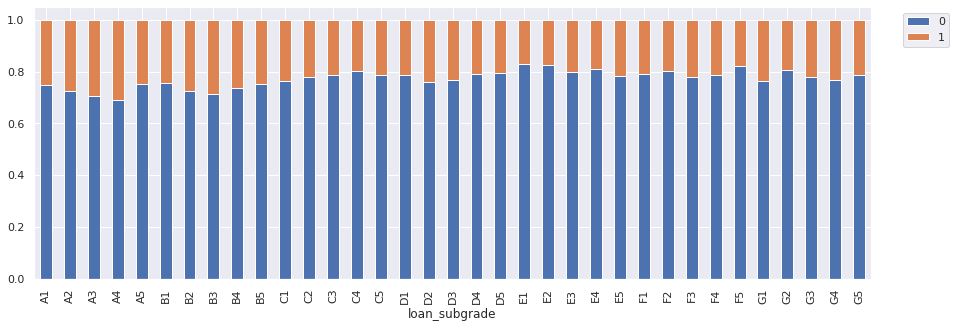

In [87]:
pd.crosstab(index = df["loan_subgrade"], columns = df["default"], normalize = "index").plot(kind = "bar", stacked = True, figsize = (15,5));
plt.legend(bbox_to_anchor = (1.1,1), loc = "upper right");

- Grade A: A4 applicants are more likely to default.
- Grade B: B3 applicants are more likely to default.
- Grade C: C1 applicants are more likely to default.
- Grade D: D2 applicants are more likely to default.
- Grade E: E5 applicants are more likely to default.
- Grade F: F3 applicants are more likely to default.
- Grade G: G1 applicants are more likely to default.

### default vs job_experience

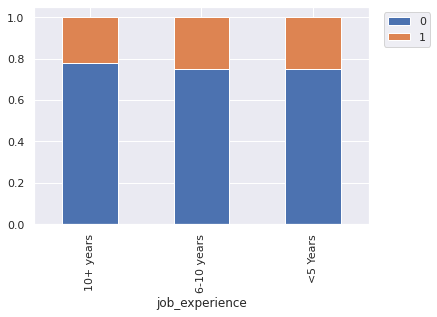

In [86]:
pd.crosstab(index = df["job_experience"], columns = df["default"], normalize = "index").plot(kind = "bar", stacked = True);
plt.legend(bbox_to_anchor = (1.2,1), loc = "upper right");

- Applicants with 10+ years of job experience are less likely to default.
- The applicants of other two categories have equal default rate.

### default vs home_ownership

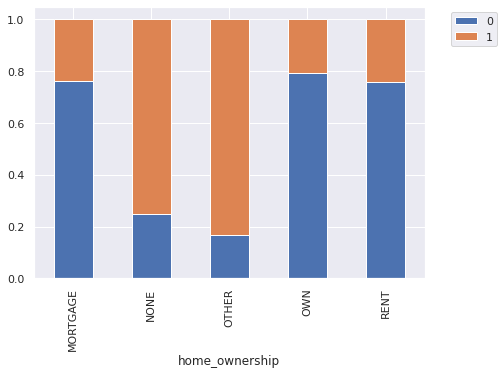

In [84]:
pd.crosstab(index = df["home_ownership"], columns = df["default"], normalize = "index").plot(kind = "bar", stacked = True, figsize = (7,5));
plt.legend(bbox_to_anchor = (1.2,1), loc = "upper right");

- Applicants with home ownership of `NONE` and `OTHER` are much more likely to default.

### default vs income_verification_status

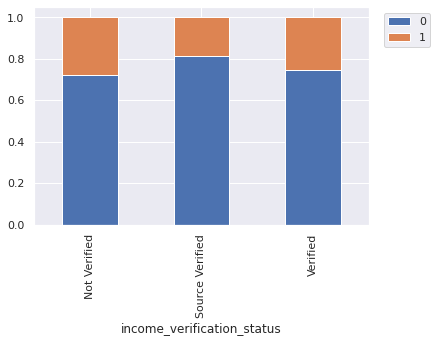

In [82]:
pd.crosstab(index = df["income_verification_status"], columns = df["default"], normalize = "index").plot(kind = "bar", stacked = True);
plt.legend(bbox_to_anchor = (1.2,1), loc = "upper right");

- Applicants tagged `Source Verified` are less likely to default than the other two categories.

### default vs loan_purpose

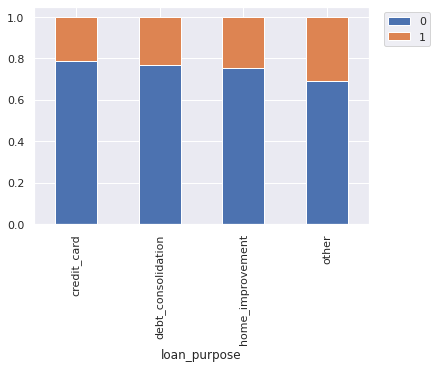

In [60]:
pd.crosstab(index = df["loan_purpose"], columns = df["default"], normalize = "index").plot(kind = "bar", stacked = True);
plt.legend(bbox_to_anchor = (1.2,1), loc = "upper right");

- Applicants using this loan for credit cards are least likely to default, while those using it for `other` purpose are most likely to default.

### default vs state_code

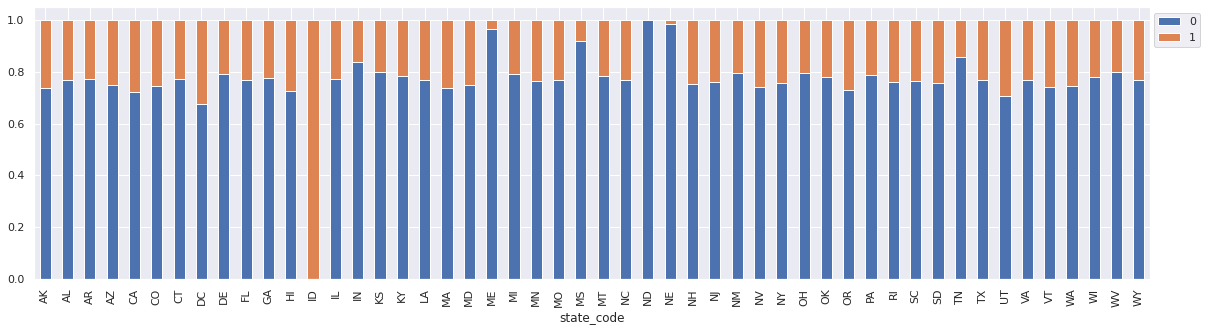

In [88]:
pd.crosstab(index = df["state_code"], columns = df["default"], normalize = "index").plot(kind = "bar", stacked = True, figsize = (20,5));
plt.legend(bbox_to_anchor = (1.05,1), loc = "upper right");

- State `ID` has the highest default rate of 100%. But based on eariler exploration, we know there's only one observation from this state. So the data is likely to be very biased.
- State `ND` has the lowest default rate, followed by `NE`, `ME`.
- Other states have default rate from 15% to 30%.

### default vs application_type

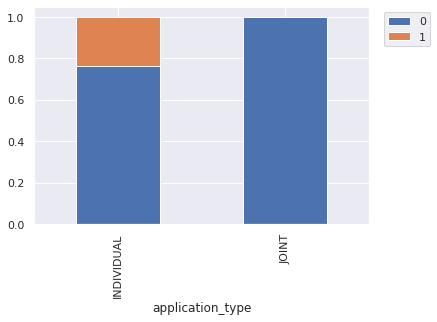

In [39]:
pd.crosstab(index = df["application_type"], columns = df["default"], normalize = "index").plot(kind = "bar", stacked = True);
plt.legend(bbox_to_anchor = (1.2,1), loc = "upper right");

- Individual applicants have around 25% default rate. Joint applicants have 0% default rate.

### default vs loan_amnt

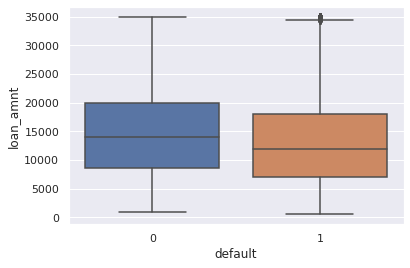

In [40]:
sns.boxplot(x = "default", y = "loan_amnt", data = df);

- Defaulters have lower loan amount.

### default vs interest_rate

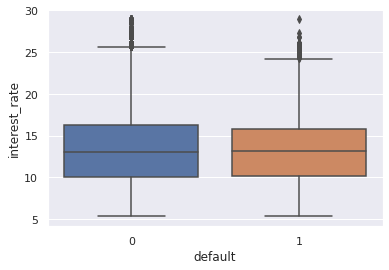

In [41]:
sns.boxplot(x = "default", y = "interest_rate", data = df);

- Interest rate hardly affects default rate.

### default vs annual_income

In [56]:
def boxplot_with_without_fliers(col):
    plt.figure(figsize = (15, 5));
    plt.subplot(121);
    sns.boxplot(x = "default", y = col, data = df);
    plt.subplot(122);
    sns.boxplot(x = "default", y = col, data = df, showfliers = False);

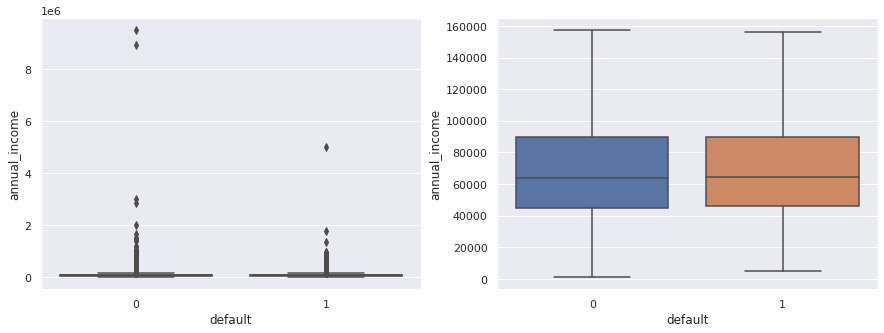

In [57]:
boxplot_with_without_fliers("annual_income")

- Outliers exist in both groups. After excluding outliers, `annual_income` doesn't affect default rate.

### default vs debt_to_income

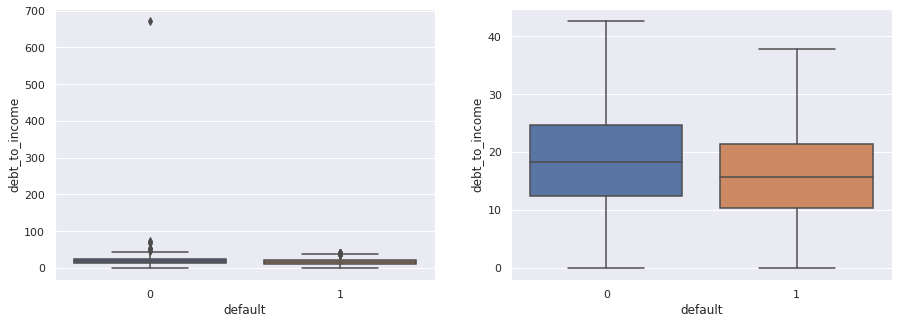

In [58]:
boxplot_with_without_fliers("debt_to_income")

- Defaulters have lower `debt_to_income`.

### default vs delinq_2yrs

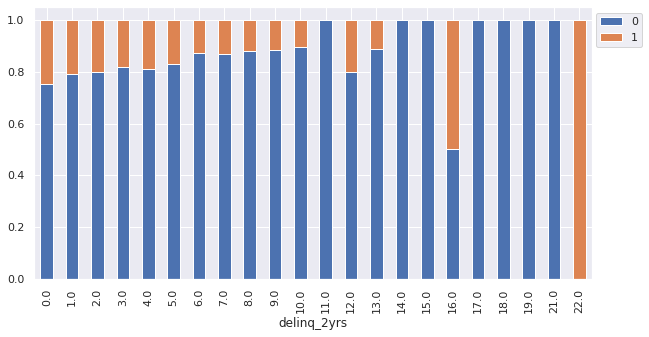

In [62]:
pd.crosstab(index = df["delinq_2yrs"], columns = df["default"], normalize = "index").plot(kind = "bar", stacked = True, figsize = (10,5));
plt.legend(bbox_to_anchor = (1.1,1), loc = "upper right");

- Applicants missing their loan payments for 30+ days in the pass 2 years for 22 times have 100% default rate, followed by those missing for 16 times.
- However, those missing for 11/14/15/17/18/19/21 times have 0% default rate.

### default vs public_records

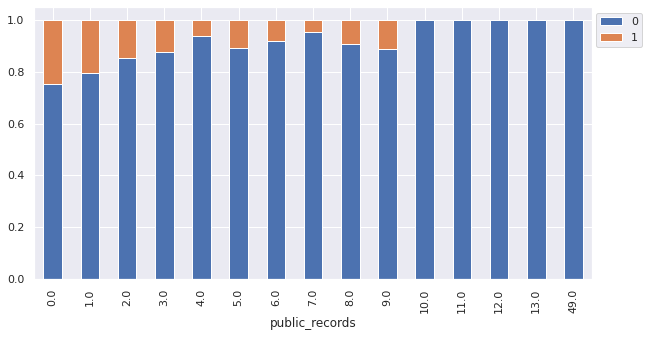

In [63]:
pd.crosstab(index = df["public_records"], columns = df["default"], normalize = "index").plot(kind = "bar", stacked = True, figsize = (10,5));
plt.legend(bbox_to_anchor = (1.1,1), loc = "upper right");

- Applicants with more legal cases against them are more less likely to default.

### default vs revolving_balance

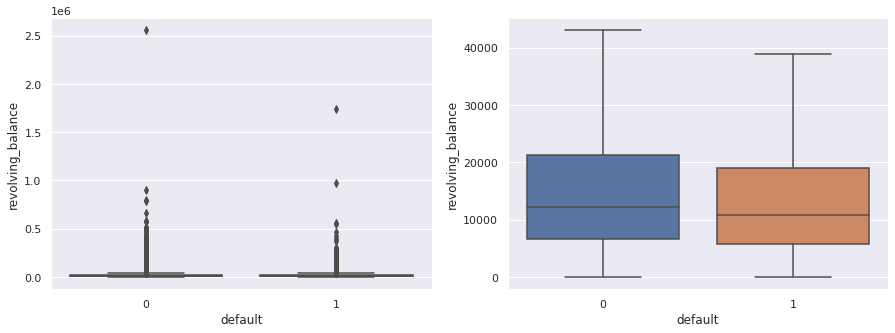

In [73]:
boxplot_with_without_fliers("revolving_balance")

- Both groups have a number of outliers on the upper end. After excluding the outliers, defaulters have lower `revolving_balance`.

### default vs total_acc

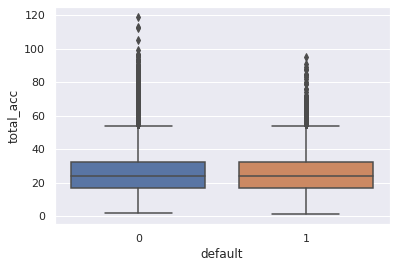

In [74]:
sns.boxplot(x = "default", y = "total_acc", data = df);

- Both groups have a number of outliers on the upper end. After excluding the outliers, `total_acc` has little effect on default rate.

### default vs interest_receive

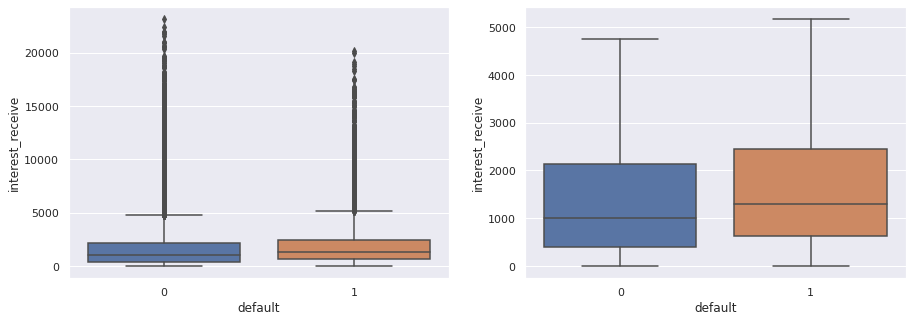

In [76]:
boxplot_with_without_fliers("interest_receive")

- Both groups have a number of outliers on the upper end. After excluding the outliers, defaulters pay more interest to the bank.

### default vs last_week_pay

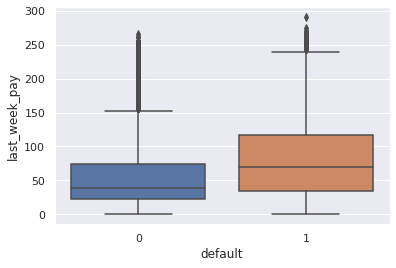

In [77]:
sns.boxplot(x = "default", y = "last_week_pay", data = df);

- Both groups have a number of outliers on the upper end. Defaulters make loan payments for a longer period.

### default vs total_current_balance

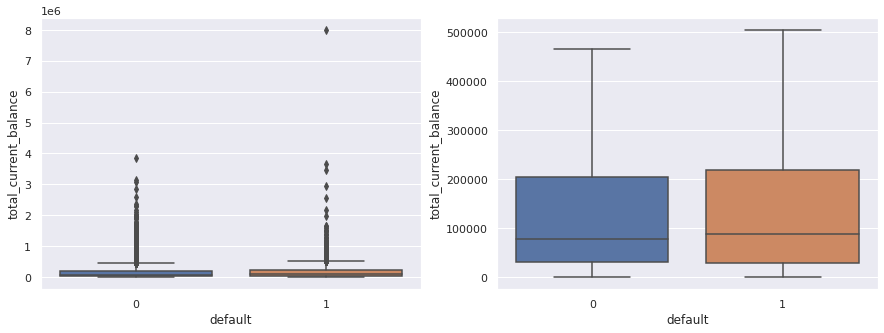

In [79]:
boxplot_with_without_fliers("total_current_balance")

- Both groups have a number of outliers on the upper end. After excluding the outliers, defaulters have slightly higher `total_current_balance`.

### default vs total_revolving_limit

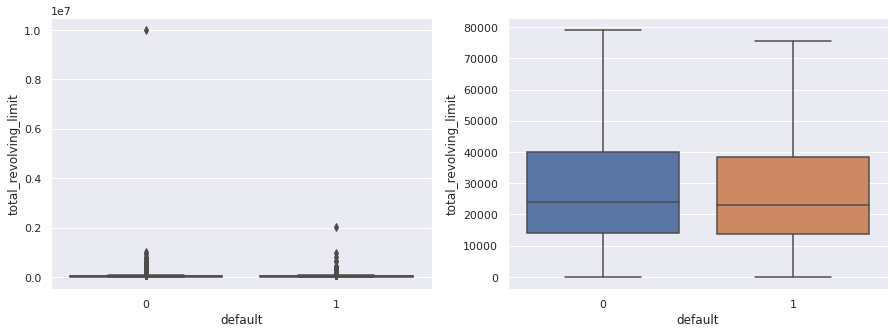

In [80]:
boxplot_with_without_fliers("total_revolving_limit")

- Both groups have a number of outliers on the upper end. After excluding the outliers, defaulters have slightly lower `total_revolving_limit`.

# Data Pre-processing

In [34]:
backup = df.copy() # for debug use

In [189]:
df = backup.copy()

## Outlier treatment

In [190]:
def outlier_treatment(col, lower = None, upper = None):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    
    if not lower and not upper:
        return col.clip(lower = q1 - 1.5 * iqr, upper = q3 + 1.5 * iqr)
    
    return col.clip(lower = lower, upper = upper)

- `delinq_2yrs` shoud not be clipped. Since most of the data is 0, the information lies at the non-zero values.

In [191]:
outliers = [
    ("interest_rate", None, None),
    ("annual_income", 0, 1000000),
    ("debt_to_income", 0, 40),
    ("public_records", 0, 14),
    ("revolving_balance", 0, 400000),
    ("total_acc", 0, 100),
    ("interest_receive", 0, 20000),
    ("last_week_pay", 0, 270),
    ("total_current_balance", 0, 2000000),
    ("total_revolving_limit", 0, 600000),
]

# outlier treatment on train set and validation set
for col, lower, upper in outliers:
    df[col] = outlier_treatment(df[col], lower, upper)

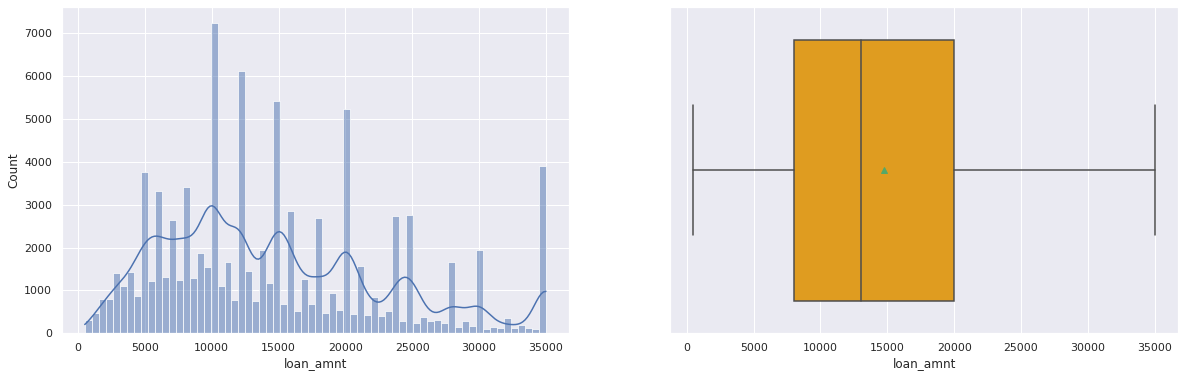

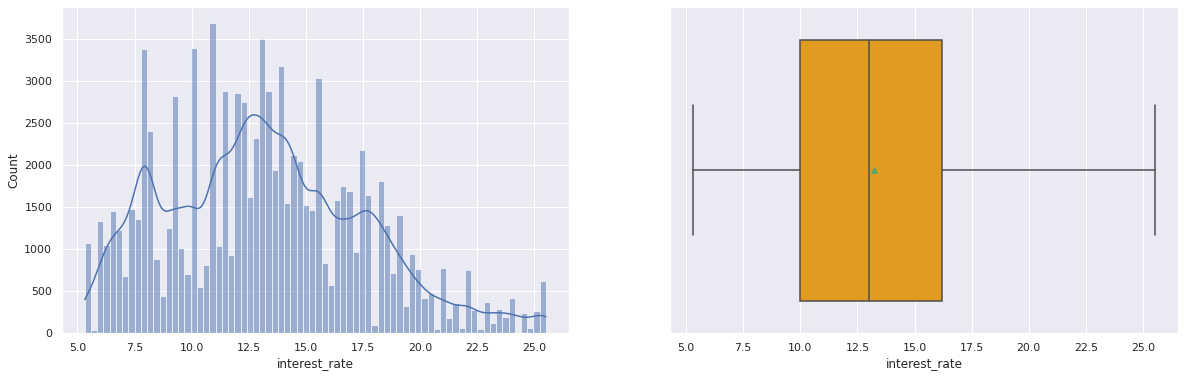

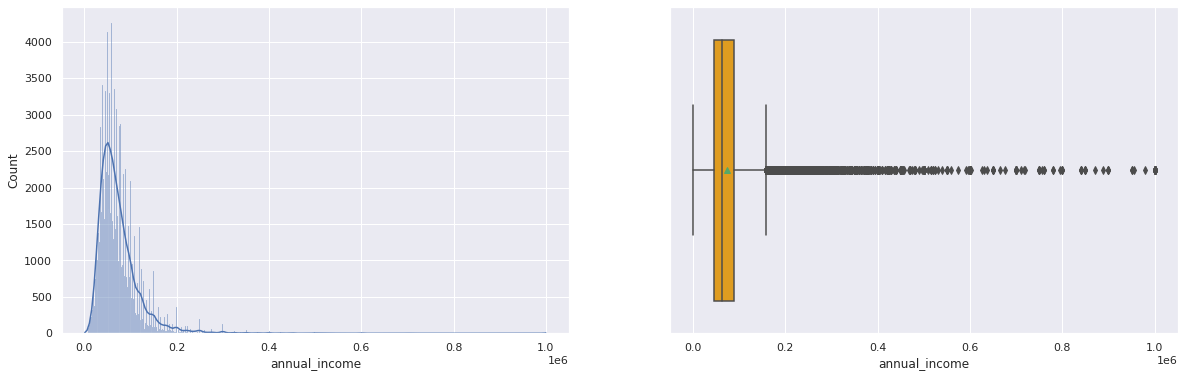

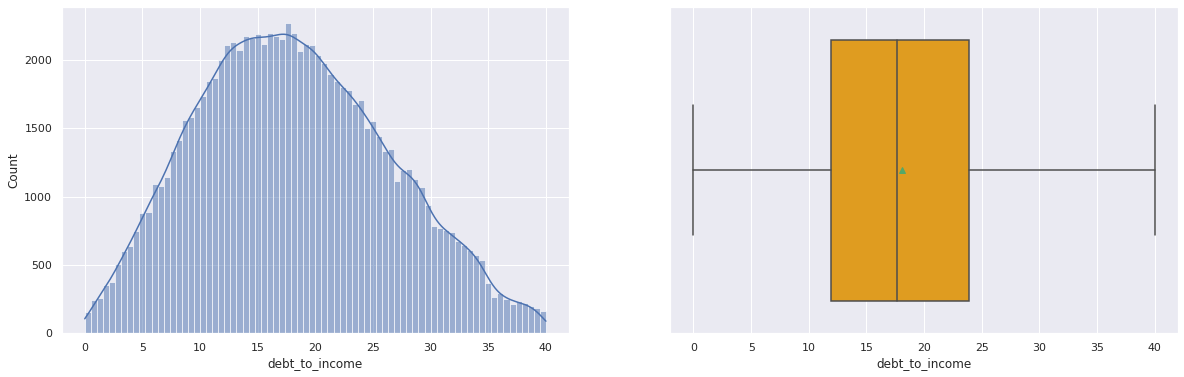

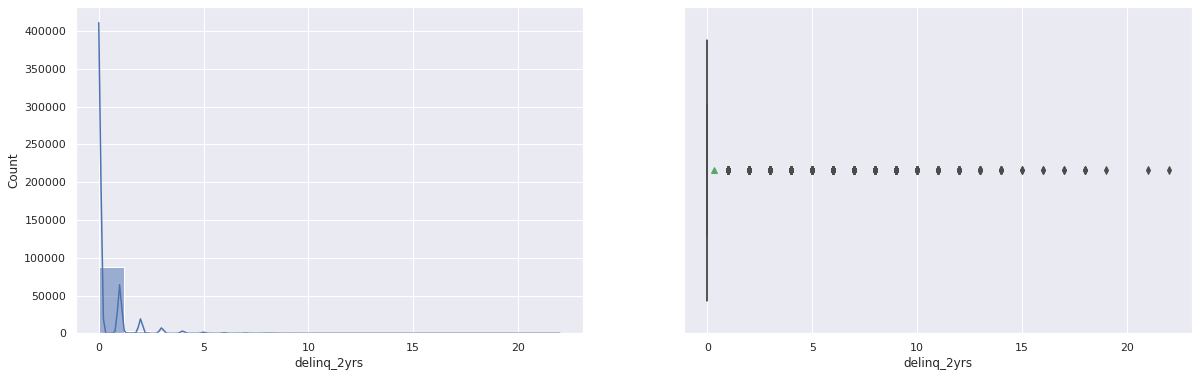

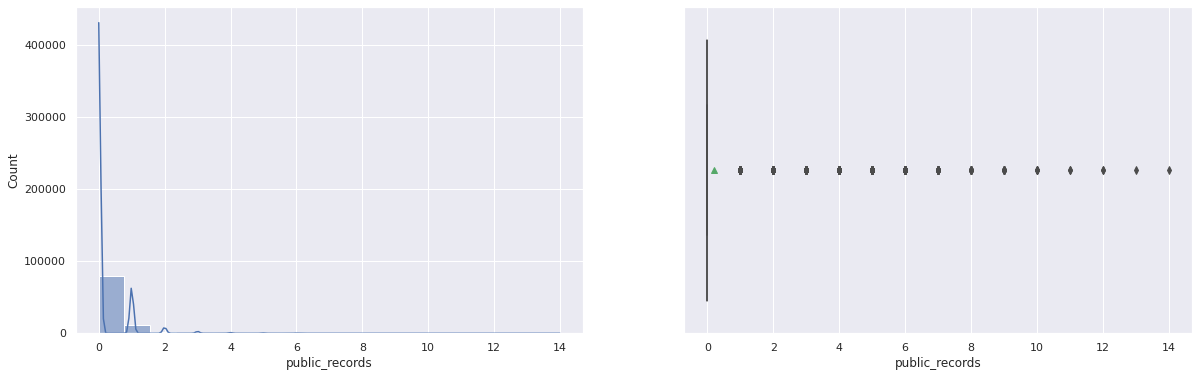

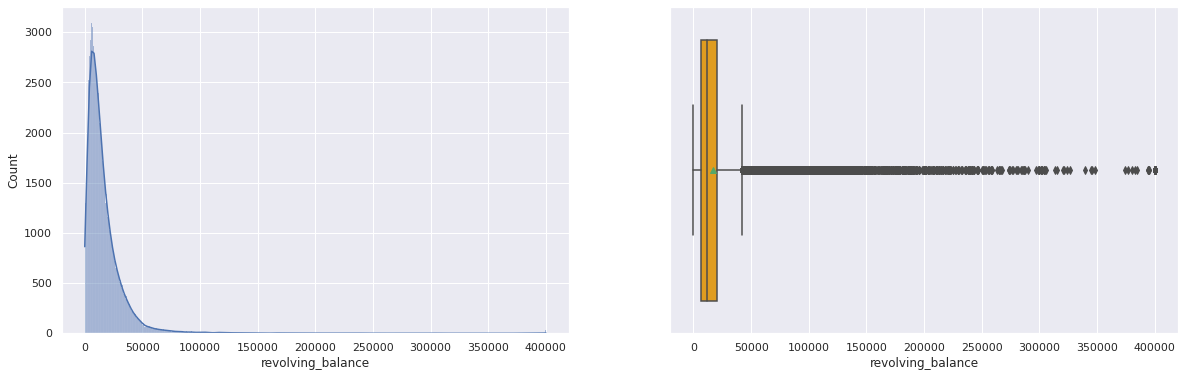

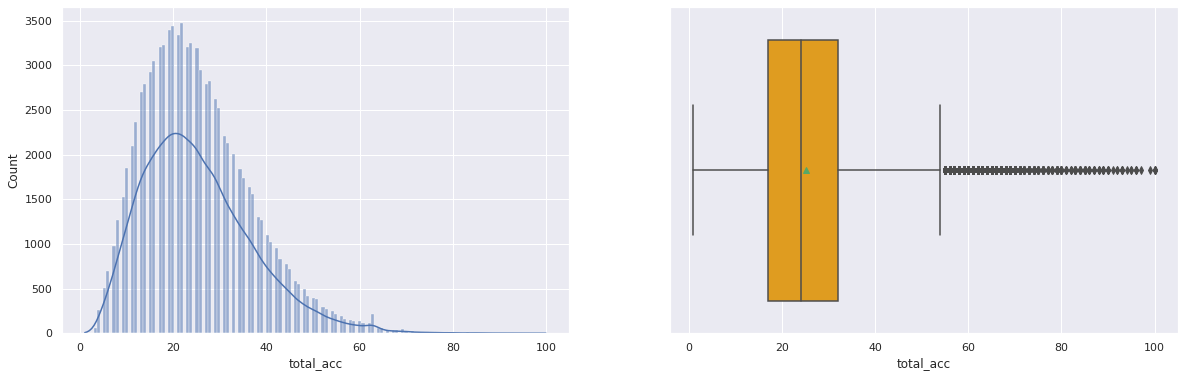

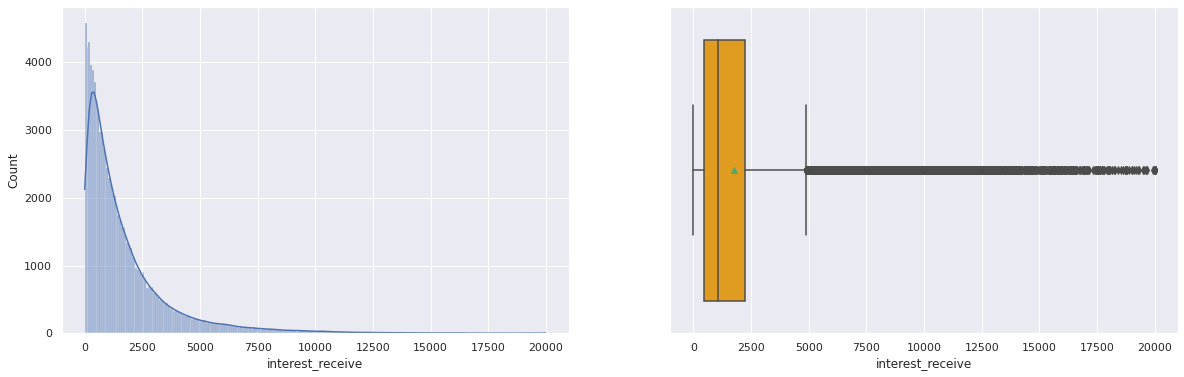

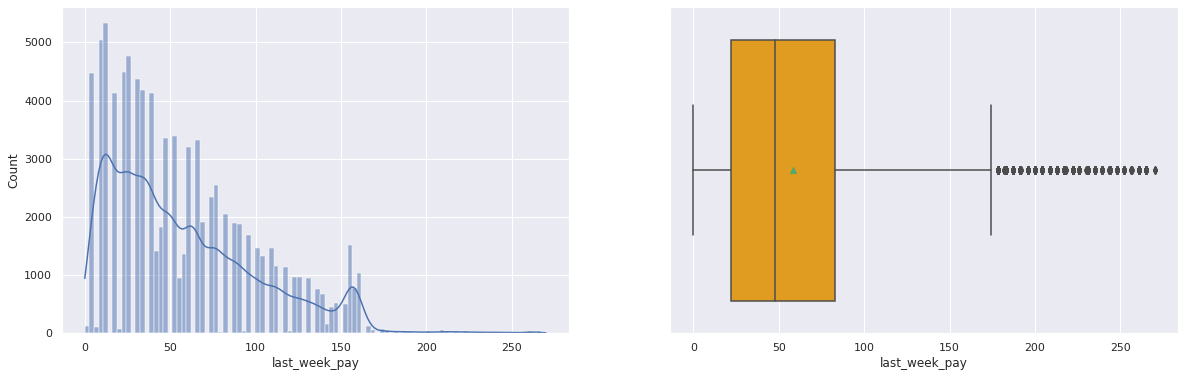

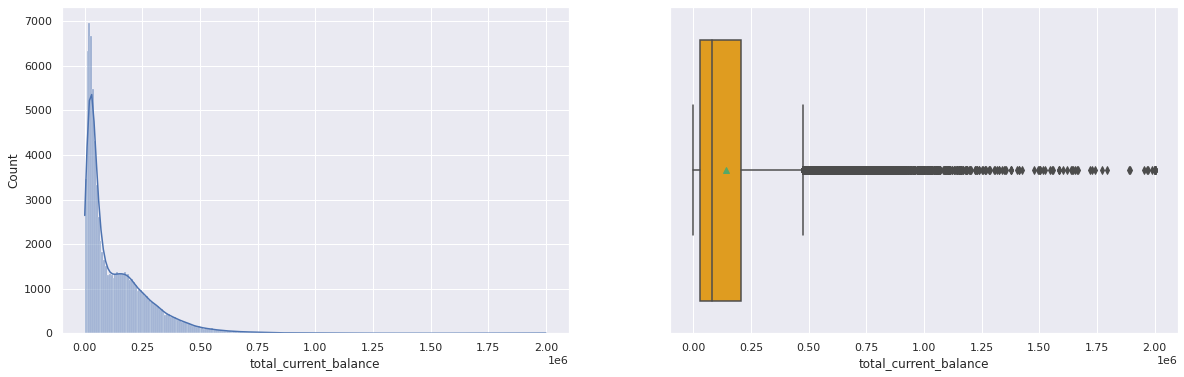

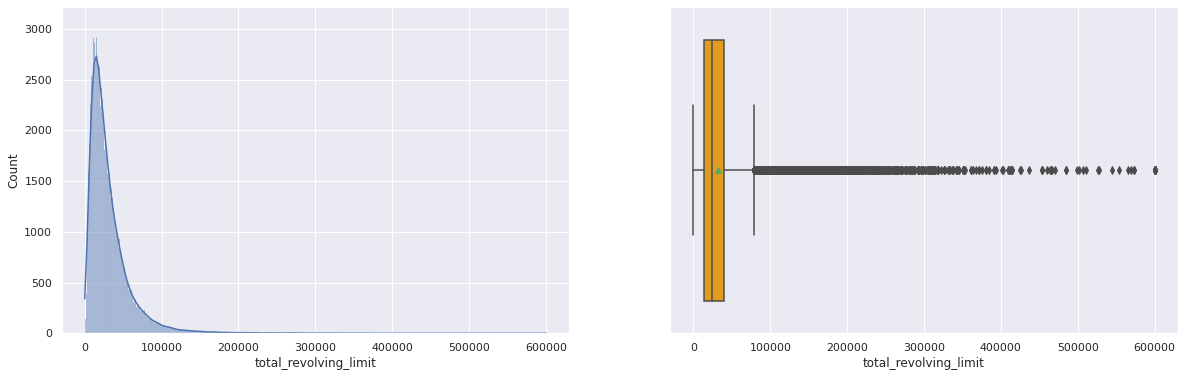

In [192]:
for col in num_cols:
    hist_box_plot(col)   # plot histogram and boxplot for numerical columns

In [158]:
# # outlier treatment on test set
# for col, lower, upper in outliers:
#     test_X[col] = outlier_treatment(test_X[col], lower, upper)

## Split data

In [193]:
X = df.drop(columns = ["default"])
y = df.default

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, stratify = y, random_state = 17)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train.head()

(69880, 21) (69880,)
(23294, 21) (23294,)


,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
24009,35000,3 years,14.3300,C,C1,10+ years,MORTGAGE,"140,000.0000",Verified,credit_card,CO,18.2300,0.0000,1.0000,30115,23.0000,"8,251.8100",INDIVIDUAL,152.0000,"369,057.0000","45,000.0000"
36773,4000,3 years,13.5300,B,B5,NaN,OWN,"75,000.0000",Verified,other,LA,12.5700,0.0000,1.0000,24247,20.0000,775.1500,INDIVIDUAL,104.0000,"283,648.0000","26,500.0000"
43988,10500,5 years,16.9900,D,D1,6-10 years,MORTGAGE,"49,000.0000",Source Verified,credit_card,NY,28.1900,0.0000,0.0000,15472,28.0000,"1,960.8900",INDIVIDUAL,65.0000,"220,577.0000","30,600.0000"
70638,7200,3 years,14.6500,C,C5,NaN,MORTGAGE,"42,000.0000",Verified,debt_consolidation,CA,15.8600,0.0000,0.0000,35040,33.0000,162.1200,INDIVIDUAL,9.0000,"204,553.0000","68,300.0000"
48984,12000,3 years,6.2400,A,A2,<5 Years,RENT,"71,315.0000",Verified,credit_card,NY,5.4500,0.0000,0.0000,12203,6.0000,197.0100,INDIVIDUAL,13.0000,"12,203.0000","17,000.0000"


In [194]:
X_test.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
85953,9600,3 years,18.4900,D,D2,10+ years,RENT,"50,000.0000",Not Verified,home_improvement,NY,15.4300,0.0000,0.0000,9184,21.0000,"2,944.0600",INDIVIDUAL,144.0000,"14,900.0000","15,000.0000"
28400,35000,5 years,18.5500,E,E2,<5 Years,MORTGAGE,"105,000.0000",Verified,credit_card,TN,20.0800,0.0000,0.0000,45934,34.0000,"3,577.7900",INDIVIDUAL,31.0000,"302,415.0000","71,000.0000"
3284,16000,5 years,11.9900,B,B5,<5 Years,OWN,"89,000.0000",Not Verified,debt_consolidation,MA,6.6300,0.0000,0.0000,8357,26.0000,"1,636.8800",INDIVIDUAL,48.0000,"353,051.0000","13,100.0000"
14317,15000,5 years,14.9900,C,C5,10+ years,MORTGAGE,"46,000.0000",Not Verified,home_improvement,GA,31.3600,1.0000,0.0000,5834,13.0000,"2,236.8700",INDIVIDUAL,57.0000,"148,110.0000","8,100.0000"
27178,28000,3 years,11.9900,B,B3,10+ years,RENT,"70,000.0000",Not Verified,debt_consolidation,NY,23.9500,0.0000,0.0000,36376,41.0000,"4,283.9300",INDIVIDUAL,87.0000,"52,336.0000","74,200.0000"


## KNN imputer

In [195]:
# convert categorical variables into numbers
dt = {}
cat_cols = df.select_dtypes(include = ["object"]).columns

for col in cat_cols:
    to_replace = list(df[col].value_counts().index)
    value = list(range(1, len(to_replace) + 1))
    dt[col] = (to_replace, value)
    X_train.loc[:,col] = X_train[col].replace(to_replace, value)
    X_test.loc[:,col] = X_test[col].replace(to_replace, value)
    test_X.loc[:,col] = test_X[col].replace(to_replace, value)
    
X_train.head()

/home/liangym2014/venv/meow/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
24009,35000,1,14.3300,2,4,2.0000,1,"140,000.0000",2,2,17,18.2300,0.0000,1.0000,30115,23.0000,"8,251.8100",1,152.0000,"369,057.0000","45,000.0000"
36773,4000,1,13.5300,1,8,NaN,3,"75,000.0000",2,3,26,12.5700,0.0000,1.0000,24247,20.0000,775.1500,1,104.0000,"283,648.0000","26,500.0000"
43988,10500,2,16.9900,4,12,3.0000,1,"49,000.0000",1,2,2,28.1900,0.0000,0.0000,15472,28.0000,"1,960.8900",1,65.0000,"220,577.0000","30,600.0000"
70638,7200,1,14.6500,2,11,NaN,1,"42,000.0000",2,1,1,15.8600,0.0000,0.0000,35040,33.0000,162.1200,1,9.0000,"204,553.0000","68,300.0000"
48984,12000,1,6.2400,3,19,1.0000,2,"71,315.0000",2,2,2,5.4500,0.0000,0.0000,12203,6.0000,197.0100,1,13.0000,"12,203.0000","17,000.0000"


In [196]:
test_X.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,12000,1,15.3100,2,3,1.0000,1,"73,400.0000",3,1,1,14.6200,0.0000,0.0000,22156,30.0000,"2,290.2400",1,87.0000,"128,098.0000","25,800.0000"
1,12000,1,7.2600,3,13,2.0000,1,"105,000.0000",3,2,10,11.3800,0.0000,0.0000,7592,14.0000,202.6800,1,13.0000,"269,396.0000","23,600.0000"
2,15000,1,14.3300,2,4,3.0000,1,"50,000.0000",2,1,3,28.1500,0.0000,1.0000,17983,19.0000,"1,166.2400",1,30.0000,"220,135.0000","34,100.0000"
3,12000,1,9.9900,1,1,3.0000,2,"37,000.0000",1,2,6,34.3200,0.0000,0.0000,12262,18.0000,635.0600,1,35.0000,"39,436.0000","21,700.0000"
4,20150,1,11.5300,1,8,1.0000,2,"75,000.0000",1,1,1,26.7400,1.0000,0.0000,8251,11.0000,"1,232.8400",1,31.0000,"52,764.0000","12,000.0000"


In [197]:
# knn imputer
knn = KNNImputer()
X_train = pd.DataFrame(knn.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(knn.transform(X_test), columns = X_test.columns, index = X_test.index)
test_X = pd.DataFrame(knn.transform(test_X), columns = test_X.columns, index = test_X.index)

X_train.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
24009,"35,000.0000",1.0000,14.3300,2.0000,4.0000,2.0000,1.0000,"140,000.0000",2.0000,2.0000,17.0000,18.2300,0.0000,1.0000,"30,115.0000",23.0000,"8,251.8100",1.0000,152.0000,"369,057.0000","45,000.0000"
36773,"4,000.0000",1.0000,13.5300,1.0000,8.0000,1.0000,3.0000,"75,000.0000",2.0000,3.0000,26.0000,12.5700,0.0000,1.0000,"24,247.0000",20.0000,775.1500,1.0000,104.0000,"283,648.0000","26,500.0000"
43988,"10,500.0000",2.0000,16.9900,4.0000,12.0000,3.0000,1.0000,"49,000.0000",1.0000,2.0000,2.0000,28.1900,0.0000,0.0000,"15,472.0000",28.0000,"1,960.8900",1.0000,65.0000,"220,577.0000","30,600.0000"
70638,"7,200.0000",1.0000,14.6500,2.0000,11.0000,1.4000,1.0000,"42,000.0000",2.0000,1.0000,1.0000,15.8600,0.0000,0.0000,"35,040.0000",33.0000,162.1200,1.0000,9.0000,"204,553.0000","68,300.0000"
48984,"12,000.0000",1.0000,6.2400,3.0000,19.0000,1.0000,2.0000,"71,315.0000",2.0000,2.0000,2.0000,5.4500,0.0000,0.0000,"12,203.0000",6.0000,197.0100,1.0000,13.0000,"12,203.0000","17,000.0000"


In [198]:
test_X.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,"12,000.0000",1.0000,15.3100,2.0000,3.0000,1.0000,1.0000,"73,400.0000",3.0000,1.0000,1.0000,14.6200,0.0000,0.0000,"22,156.0000",30.0000,"2,290.2400",1.0000,87.0000,"128,098.0000","25,800.0000"
1,"12,000.0000",1.0000,7.2600,3.0000,13.0000,2.0000,1.0000,"105,000.0000",3.0000,2.0000,10.0000,11.3800,0.0000,0.0000,"7,592.0000",14.0000,202.6800,1.0000,13.0000,"269,396.0000","23,600.0000"
2,"15,000.0000",1.0000,14.3300,2.0000,4.0000,3.0000,1.0000,"50,000.0000",2.0000,1.0000,3.0000,28.1500,0.0000,1.0000,"17,983.0000",19.0000,"1,166.2400",1.0000,30.0000,"220,135.0000","34,100.0000"
3,"12,000.0000",1.0000,9.9900,1.0000,1.0000,3.0000,2.0000,"37,000.0000",1.0000,2.0000,6.0000,34.3200,0.0000,0.0000,"12,262.0000",18.0000,635.0600,1.0000,35.0000,"39,436.0000","21,700.0000"
4,"20,150.0000",1.0000,11.5300,1.0000,8.0000,1.0000,2.0000,"75,000.0000",1.0000,1.0000,1.0000,26.7400,1.0000,0.0000,"8,251.0000",11.0000,"1,232.8400",1.0000,31.0000,"52,764.0000","12,000.0000"


In [199]:
# convert numbers back to categories
for col, conv in dt.items():
    to_replace, value = conv
    X_train.loc[:,col] = np.round(X_train[col]).replace(value, to_replace)
    X_test.loc[:,col] = np.round(X_test[col]).replace(value, to_replace)
    test_X.loc[:,col] = np.round(test_X[col]).replace(value, to_replace)
      
X_train.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
24009,"35,000.0000",3 years,14.3300,C,C1,10+ years,MORTGAGE,"140,000.0000",Verified,credit_card,CO,18.2300,0.0000,1.0000,"30,115.0000",23.0000,"8,251.8100",INDIVIDUAL,152.0000,"369,057.0000","45,000.0000"
36773,"4,000.0000",3 years,13.5300,B,B5,<5 Years,OWN,"75,000.0000",Verified,other,LA,12.5700,0.0000,1.0000,"24,247.0000",20.0000,775.1500,INDIVIDUAL,104.0000,"283,648.0000","26,500.0000"
43988,"10,500.0000",5 years,16.9900,D,D1,6-10 years,MORTGAGE,"49,000.0000",Source Verified,credit_card,NY,28.1900,0.0000,0.0000,"15,472.0000",28.0000,"1,960.8900",INDIVIDUAL,65.0000,"220,577.0000","30,600.0000"
70638,"7,200.0000",3 years,14.6500,C,C5,<5 Years,MORTGAGE,"42,000.0000",Verified,debt_consolidation,CA,15.8600,0.0000,0.0000,"35,040.0000",33.0000,162.1200,INDIVIDUAL,9.0000,"204,553.0000","68,300.0000"
48984,"12,000.0000",3 years,6.2400,A,A2,<5 Years,RENT,"71,315.0000",Verified,credit_card,NY,5.4500,0.0000,0.0000,"12,203.0000",6.0000,197.0100,INDIVIDUAL,13.0000,"12,203.0000","17,000.0000"


In [200]:
test_X.head() 

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,"12,000.0000",3 years,15.3100,C,C2,<5 Years,MORTGAGE,"73,400.0000",Not Verified,debt_consolidation,CA,14.6200,0.0000,0.0000,"22,156.0000",30.0000,"2,290.2400",INDIVIDUAL,87.0000,"128,098.0000","25,800.0000"
1,"12,000.0000",3 years,7.2600,A,A4,10+ years,MORTGAGE,"105,000.0000",Not Verified,credit_card,VA,11.3800,0.0000,0.0000,"7,592.0000",14.0000,202.6800,INDIVIDUAL,13.0000,"269,396.0000","23,600.0000"
2,"15,000.0000",3 years,14.3300,C,C1,6-10 years,MORTGAGE,"50,000.0000",Verified,debt_consolidation,TX,28.1500,0.0000,1.0000,"17,983.0000",19.0000,"1,166.2400",INDIVIDUAL,30.0000,"220,135.0000","34,100.0000"
3,"12,000.0000",3 years,9.9900,B,B3,6-10 years,RENT,"37,000.0000",Source Verified,credit_card,NJ,34.3200,0.0000,0.0000,"12,262.0000",18.0000,635.0600,INDIVIDUAL,35.0000,"39,436.0000","21,700.0000"
4,"20,150.0000",3 years,11.5300,B,B5,<5 Years,RENT,"75,000.0000",Source Verified,debt_consolidation,CA,26.7400,1.0000,0.0000,"8,251.0000",11.0000,"1,232.8400",INDIVIDUAL,31.0000,"52,764.0000","12,000.0000"


In [201]:
for col in cat_cols:
    print(X_train[col].value_counts())
    print()

3 years    48957
5 years    20923
Name: loan_term, dtype: int64

B    20208
C    19280
A    11641
D    11023
E     5550
F     1760
G      418
Name: loan_grade, dtype: int64

B4    4452
B3    4429
C2    4165
C1    4095
B2    3886
C3    3860
C4    3846
B5    3795
B1    3646
A5    3545
C5    3314
D1    2787
A4    2752
D2    2438
D3    2040
D4    2037
A3    1842
A1    1789
D5    1721
A2    1713
E1    1436
E2    1303
E3    1147
E4     919
E5     745
F1     567
F2     403
F3     357
F4     266
F5     167
G1     135
G2     111
G3      80
G5      49
G4      43
Name: loan_subgrade, dtype: int64

<5 Years      31989
10+ years     24694
6-10 years    13197
Name: job_experience, dtype: int64

MORTGAGE    34927
RENT        28003
OWN          6932
OTHER          11
NONE            7
Name: home_ownership, dtype: int64

Source Verified    25786
Verified           22926
Not Verified       21168
Name: income_verification_status, dtype: int64

debt_consolidation    41422
credit_card           16149
other

In [202]:
for col in cat_cols:
    print(X_test[col].value_counts())
    print()

3 years    16254
5 years     7040
Name: loan_term, dtype: int64

B    6657
C    6507
A    3893
D    3692
E    1828
F     584
G     133
Name: loan_grade, dtype: int64

B3    1450
B4    1427
C3    1410
C1    1348
C4    1336
C2    1314
B5    1300
B2    1283
B1    1197
A5    1178
C5    1099
D1     929
A4     879
D2     801
D3     719
D4     680
A2     640
A3     608
A1     588
D5     563
E1     488
E2     433
E3     366
E4     309
E5     232
F1     178
F2     142
F3     108
F4      89
F5      67
G1      39
G2      35
G3      25
G4      17
G5      17
Name: loan_subgrade, dtype: int64

<5 Years      10721
10+ years      8224
6-10 years     4349
Name: job_experience, dtype: int64

MORTGAGE    11518
RENT         9446
OWN          2322
OTHER           7
NONE            1
Name: home_ownership, dtype: int64

Source Verified    8701
Verified           7524
Not Verified       7069
Name: income_verification_status, dtype: int64

debt_consolidation    13819
credit_card            5422
other          

In [203]:
for col in cat_cols:
    print(test_X[col].value_counts())
    print()

3 years    28110
5 years    11823
Name: loan_term, dtype: int64

B    11551
C    10948
A     6764
D     6237
E     3158
F     1030
G      245
Name: loan_grade, dtype: int64

B3    2547
B4    2519
C1    2436
C2    2371
B5    2247
C3    2220
B2    2206
C4    2084
A5    2069
B1    2032
C5    1837
D1    1576
A4    1559
D2    1373
D3    1175
D4    1141
A3    1074
A1    1067
A2     995
D5     972
E1     803
E2     755
E3     652
E4     519
E5     429
F1     312
F2     254
F3     195
F4     147
F5     122
G2      72
G1      71
G3      46
G5      31
G4      25
Name: loan_subgrade, dtype: int64

<5 Years      18205
10+ years     14305
6-10 years     7423
Name: job_experience, dtype: int64

MORTGAGE    20008
RENT        15938
OWN          3979
OTHER           6
NONE            2
Name: home_ownership, dtype: int64

Source Verified    14780
Verified           13195
Not Verified       11958
Name: income_verification_status, dtype: int64

debt_consolidation    23473
credit_card            9383
other

In [204]:
# check missing values
print(np.any(X_train.isnull().sum() > 0))
print(np.any(X_test.isnull().sum() > 0))
print(np.any(test_X.isnull().sum() > 0))

False
False
False


In [205]:
b1 = X_train.copy()    # for debug use
b2 = X_test.copy()
b3 = test_X.copy()

In [206]:
X_train = b1.copy()
X_test = b2.copy()
test_X = b3.copy()

## Create dummy variables

In [207]:
X_train = pd.get_dummies(X_train, drop_first = True)
print(X_train.shape)
X_train.head()

(69880, 114)


,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,loan_term_5 years,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_subgrade_A2,loan_subgrade_A3,loan_subgrade_A4,loan_subgrade_A5,loan_subgrade_B1,loan_subgrade_B2,loan_subgrade_B3,loan_subgrade_B4,loan_subgrade_B5,loan_subgrade_C1,loan_subgrade_C2,loan_subgrade_C3,loan_subgrade_C4,loan_subgrade_C5,loan_subgrade_D1,loan_subgrade_D2,loan_subgrade_D3,loan_subgrade_D4,loan_subgrade_D5,loan_subgrade_E1,loan_subgrade_E2,loan_subgrade_E3,loan_subgrade_E4,loan_subgrade_E5,loan_subgrade_F1,loan_subgrade_F2,loan_subgrade_F3,loan_subgrade_F4,loan_subgrade_F5,loan_subgrade_G1,loan_subgrade_G2,loan_subgrade_G3,loan_subgrade_G4,loan_subgrade_G5,job_experience_6-10 years,job_experience_<5 Years,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,income_verification_status_Source Verified,income_verification_status_Verified,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_other,state_code_AL,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_DE,state_code_FL,state_code_GA,state_code_HI,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,application_type_JOINT
24009,"35,000.0000",14.3300,"140,000.0000",18.2300,0.0000,1.0000,"30,115.0000",23.0000,"8,251.8100",152.0000,"369,057.0000","45,000.0000",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36773,"4,000.0000",13.5300,"75,000.0000",12.5700,0.0000,1.0000,"24,247.0000",20.0000,775.1500,104.0000,"283,648.0000","26,500.0000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43988,"10,500.0000",16.9900,"49,000.0000",28.1900,0.0000,0.0000,"15,472.0000",28.0000,"1,960.8900",65.0000,"220,577.0000","30,600.0000",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70638,"7,200.0000",14.6500,"42,000.0000",15.8600,0.0000,0.0000,"35,040.0000",33.0000,162.1200,9.0000,"204,553.0000","68,300.0000",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48984,"12,000.0000",6.2400,"71,315.0000",5.4500,0.0000,0.0000,"12,203.0000",6.0000,197.0100,13.0000,"12,203.0000","17,000.0000",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [208]:
X_test = pd.get_dummies(X_test, drop_first = True)
X_test["state_code_ID"] = 0    # because state "ID" doesn't appear in test set, we add a column for it
X_test = X_test[list(X_train.columns)]   # rearrange columns in the same order of X_train
print(X_test.shape)
X_test.head()

(23294, 114)


,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,loan_term_5 years,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_subgrade_A2,loan_subgrade_A3,loan_subgrade_A4,loan_subgrade_A5,loan_subgrade_B1,loan_subgrade_B2,loan_subgrade_B3,loan_subgrade_B4,loan_subgrade_B5,loan_subgrade_C1,loan_subgrade_C2,loan_subgrade_C3,loan_subgrade_C4,loan_subgrade_C5,loan_subgrade_D1,loan_subgrade_D2,loan_subgrade_D3,loan_subgrade_D4,loan_subgrade_D5,loan_subgrade_E1,loan_subgrade_E2,loan_subgrade_E3,loan_subgrade_E4,loan_subgrade_E5,loan_subgrade_F1,loan_subgrade_F2,loan_subgrade_F3,loan_subgrade_F4,loan_subgrade_F5,loan_subgrade_G1,loan_subgrade_G2,loan_subgrade_G3,loan_subgrade_G4,loan_subgrade_G5,job_experience_6-10 years,job_experience_<5 Years,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,income_verification_status_Source Verified,income_verification_status_Verified,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_other,state_code_AL,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_DE,state_code_FL,state_code_GA,state_code_HI,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,application_type_JOINT
85953,"9,600.0000",18.4900,"50,000.0000",15.4300,0.0000,0.0000,"9,184.0000",21.0000,"2,944.0600",144.0000,"14,900.0000","15,000.0000",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28400,"35,000.0000",18.5500,"105,000.0000",20.0800,0.0000,0.0000,"45,934.0000",34.0000,"3,577.7900",31.0000,"302,415.0000","71,000.0000",1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3284,"16,000.0000",11.9900,"89,000.0000",6.6300,0.0000,0.0000,"8,357.0000",26.0000,"1,636.8800",48.0000,"353,051.0000","13,100.0000",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14317,"15,000.0000",14.9900,"46,000.0000",31.3600,1.0000,0.0000,"5,834.0000",13.0000,"2,236.8700",57.0000,"148,110.0000","8,100.0000",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27178,"28,000.0000",11.9900,"70,000.0000",23.9500,0.0000,0.0000,"36,376.0000",41.0000,"4,283.9300",87.0000,"52,336.0000","74,200.0000",0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [209]:
test_X = pd.get_dummies(test_X, drop_first = True)
test_X = test_X[list(X_train.columns)]   # rearrange columns in the same order of X_train
print(test_X.shape)
test_X.head()

(39933, 114)


,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,loan_term_5 years,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_subgrade_A2,loan_subgrade_A3,loan_subgrade_A4,loan_subgrade_A5,loan_subgrade_B1,loan_subgrade_B2,loan_subgrade_B3,loan_subgrade_B4,loan_subgrade_B5,loan_subgrade_C1,loan_subgrade_C2,loan_subgrade_C3,loan_subgrade_C4,loan_subgrade_C5,loan_subgrade_D1,loan_subgrade_D2,loan_subgrade_D3,loan_subgrade_D4,loan_subgrade_D5,loan_subgrade_E1,loan_subgrade_E2,loan_subgrade_E3,loan_subgrade_E4,loan_subgrade_E5,loan_subgrade_F1,loan_subgrade_F2,loan_subgrade_F3,loan_subgrade_F4,loan_subgrade_F5,loan_subgrade_G1,loan_subgrade_G2,loan_subgrade_G3,loan_subgrade_G4,loan_subgrade_G5,job_experience_6-10 years,job_experience_<5 Years,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,income_verification_status_Source Verified,income_verification_status_Verified,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_other,state_code_AL,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_DE,state_code_FL,state_code_GA,state_code_HI,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,application_type_JOINT
0,"12,000.0000",15.3100,"73,400.0000",14.6200,0.0000,0.0000,"22,156.0000",30.0000,"2,290.2400",87.0000,"128,098.0000","25,800.0000",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"12,000.0000",7.2600,"105,000.0000",11.3800,0.0000,0.0000,"7,592.0000",14.0000,202.6800,13.0000,"269,396.0000","23,600.0000",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,"15,000.0000",14.3300,"50,000.0000",28.1500,0.0000,1.0000,"17,983.0000",19.0000,"1,166.2400",30.0000,"220,135.0000","34,100.0000",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,"12,000.0000",9.9900,"37,000.0000",34.3200,0.0000,0.0000,"12,262.0000",18.0000,635.0600,35.0000,"39,436.0000","21,700.0000",0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"20,150.0000",11.5300,"75,000.0000",26.7400,1.0000,0.0000,"8,251.0000",11.0000,"1,232.8400",31.0000,"52,764.0000","12,000.0000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Model Building

In [99]:
# metrics
scorer = "accuracy"

# metrics compare
cmp = pd.DataFrame(index = ["Train Accuracy", "Test Accuracy"])

cv_score = {}  # accuracy for different models
models = {}  # dictionary: model names and models


kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=3)  # 3 folds
class_weight = {0: 23.75, 1: 76.25}

In [100]:
def metrics(model, X_train, y_train, X_test, y_test):
    model = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    print("train accuracy:", acc_train)
    print("test accuracy:", acc_test)
    
    return model, [acc_train, acc_test]

## KNeighbors
### Round 1: basic

In [101]:
knc = make_pipeline(  StandardScaler(),   KNeighborsClassifier(n_neighbors=11, n_jobs = -1)  )
cv_score["knn"] = cross_val_score(knc, X_train, y_train, scoring=scorer, cv=kfold, n_jobs=-1)
print("cross validation scores: ", cv_score["knn"])
print("cross validation score mean: ", cv_score["knn"].mean())

cross validation scores:  [0.75830686 0.75829648 0.75928391]
cross validation score mean:  0.7586290830312378


In [102]:
knc, acc = metrics(knc, X_train, y_train, X_test, y_test)
models["knn"] = knc
cmp["knn"] = acc

train accuracy: 0.7845878649112765
test accuracy: 0.7605391946423972


- No overfitting. But test accuracy is pretty low.

### Round 2: hyperparameter tuning

In [103]:
knc_tuned = make_pipeline( StandardScaler(),    KNeighborsClassifier(n_jobs = -1)  )
para = {
    "kneighborsclassifier__n_neighbors":  np.arange(5, 18, 2),
#     "kneighborsclassifier__weights": ["uniform", "distance"],
}

# clf = RandomizedSearchCV(estimator = knc_tuned, param_distributions = para, n_iter = 50, scoring = scorer,  
#                          cv=kfold, random_state=3).fit(X_train, y_train)

clf = GridSearchCV(estimator = knc_tuned, param_grid = para, scoring=scorer , cv=kfold).fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

0.7641098991124514
{'kneighborsclassifier__n_neighbors': 17}


In [104]:
knc_tuned, acc = metrics(clf.best_estimator_, X_train, y_train, X_test, y_test)
models["knn_tuned"] = knc_tuned
cmp["knn_tuned"] = acc

train accuracy: 0.7776760160274757
test accuracy: 0.765175581694857


- No overfitting. No improvement.

## Ensemble models
### Round 1: basic

In [105]:
# ensemble models
rf = make_pipeline( StandardScaler(),   RandomForestClassifier(class_weight = class_weight, n_jobs=-1, random_state=1)  )
bgc = make_pipeline( StandardScaler(),  BaggingClassifier(n_estimators=40, n_jobs=-1, random_state=1)  )
adc = make_pipeline( StandardScaler(),   AdaBoostClassifier(n_estimators=80, random_state=1)  )
gbc = make_pipeline( StandardScaler(),    GradientBoostingClassifier(random_state=1)  )
xgc = make_pipeline(  StandardScaler(),     XGBClassifier(objective='binary:logistic', booster = "gbtree", n_jobs = -1, random_state=1)  )
cat = make_pipeline(  StandardScaler(),     CatBoostClassifier(iterations=400, random_seed=1, verbose = 0)   )

models.update({
    "rf": rf, 
    "bgc": bgc,
    "adc": adc,
    "gbc": gbc,
    "xgc": xgc, 
    "cat": cat,
})

for name, model in models.items():
    cv_score[name] = cross_val_score(model, X_train, y_train, scoring=scorer, cv=kfold, n_jobs=-1)
    print(name, ":", cv_score[name].mean())

knn : 0.7586290830312378
knn_tuned : 0.7641098991124514
rf : 0.8034201739340148
bgc : 0.8311534131415153
adc : 0.7959645322127201
gbc : 0.8010303538179556
xgc : 0.8621923106070705
cat : 0.8632083329636538


In [106]:
cv_acc = pd.DataFrame(data = cv_score.values(), index = cv_score.keys())
cv_acc

,0,1,2
knn,0.7583,0.7583,0.7593
knn_tuned,0.7644,0.7640,0.7640
rf,0.8017,0.8029,0.8057
bgc,0.8306,0.8316,0.8312
adc,0.7945,0.7953,0.7981
gbc,0.7999,0.7992,0.8040
xgc,0.8635,0.8611,0.8620
cat,0.8649,0.8616,0.8631


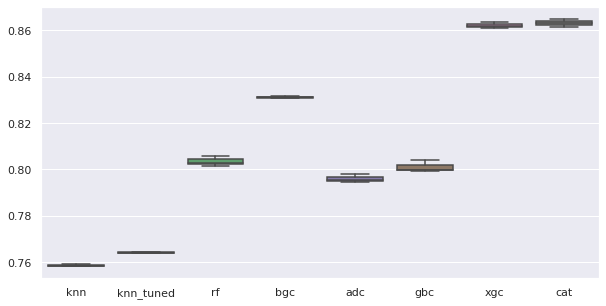

In [107]:
plt.figure(figsize = (10, 5));
sns.boxplot(data = cv_acc.T);

In [108]:
for name, model in models.items():
    print(name + ":")
    model, acc = metrics(model, X_train, y_train, X_test, y_test)
    cmp[name] = acc
    print()

knn:
train accuracy: 0.7845878649112765
test accuracy: 0.7605391946423972

knn_tuned:
train accuracy: 0.7776760160274757
test accuracy: 0.765175581694857

rf:
train accuracy: 1.0
test accuracy: 0.8051000257577059

bgc:
train accuracy: 0.9991700057240984
test accuracy: 0.8396582811024298

adc:
train accuracy: 0.796322266742988
test accuracy: 0.7923928908731862

gbc:
train accuracy: 0.8029336004579278
test accuracy: 0.8005494977247359

xgc:


/home/liangym2014/venv/meow/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:50:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 0.8927590154550659
test accuracy: 0.863784665579119

cat:
train accuracy: 0.8855180309101317
test accuracy: 0.8660599295956041



- rf and bgc are overfitting.
- cat has the highest accuracy, followed by xgc and gbc/adc.

### Round 2: hyperparameter tuning
#### Random Forest

In [109]:
rf_tuned = make_pipeline( StandardScaler(),   RandomForestClassifier(class_weight = class_weight, n_jobs=-1, random_state=1)  )
para = {
    "randomforestclassifier__max_features": ["sqrt", "log2", None, 0.6, 0.7, 0.8],
    "randomforestclassifier__min_impurity_decrease": [0, 0.001, 0.01],
    "randomforestclassifier__max_depth": np.arange(4,15),
    "randomforestclassifier__n_estimators": np.arange(100, 201, 10),
    "randomforestclassifier__max_samples": [None, 0.6, 0.7, 0.8],
}

clf = RandomizedSearchCV(estimator = rf_tuned, param_distributions = para, n_iter = 50, scoring = scorer, n_jobs=-1, 
                         cv=kfold, random_state=3).fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.7908271638819385
{'randomforestclassifier__n_estimators': 180, 'randomforestclassifier__min_impurity_decrease': 0.01, 'randomforestclassifier__max_samples': None, 'randomforestclassifier__max_features': 0.8, 'randomforestclassifier__max_depth': 13}


In [110]:
rf_tuned, acc = metrics(clf.best_estimator_, X_train, y_train, X_test, y_test)
models["rf_tuned"] = rf_tuned
cmp["rf_tuned"] = acc

train accuracy: 0.7917572982255294
test accuracy: 0.7927792564608912


- No more overfitting. Accuracy doesn't get improved.

#### Bagging Classifier

In [111]:
bgc_tuned = make_pipeline( StandardScaler(),   BaggingClassifier(n_jobs=-1, random_state=1)  )
para = {
    "baggingclassifier__n_estimators": np.arange(0, 81, 20),
    "baggingclassifier__max_samples": [1, 0.9, 0.8, 0.7],
    "baggingclassifier__max_features": [1, 0.9, 0.8, 0.7],
}

clf = RandomizedSearchCV(estimator = bgc_tuned, param_distributions = para, n_iter = 80, scoring = scorer, n_jobs=-1, 
                         cv=kfold, random_state=3).fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

/home/liangym2014/venv/meow/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.76249285 0.76249285 0.76249285 0.76249285        nan
 0.76249285 0.76249285 0.76249285 0.76249285        nan 0.76249285
 0.76249285 0.76249285 0.76249285        nan 0.76249285 0.76249285
 0.76249285 0.76249285        nan 0.76249285 0.76249285 0.76249285
 0.76249285        nan 0.82910706 0.82757587 0.82982258 0.83039499
        nan 0.82617341 0.8265884  0.82839154 0.82943619        nan
 0.82532914 0.82445621 0.82591586 0.82648826        nan 0.76249285
 0.76249285 0.76249285 0.76249285        nan 0.82230971 0.8224528
 0.82444192 0.82447055        nan 0.82291071 0.82160848 0.82445624
 0.82391243        nan 0.82059247 0.81864626 0.82155125 0.82150831
        nan 0.76249285 0.76249285 0.76249285 0.76249285        nan
 0.81657132 0.81708647 0.81778767 0.81710077        nan 0.81555527
 0.81711507 0.81858902 0.81764453        

0.8303949911883463
{'baggingclassifier__n_estimators': 80, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__max_features': 0.9}


In [112]:
bgc_tuned, acc = metrics(clf.best_estimator_, X_train, y_train, X_test, y_test)
models["bgc_tuned"] = bgc_tuned
cmp["bgc_tuned"] = acc

train accuracy: 0.9996851745850028
test accuracy: 0.8392719155147248


- Still overfitting. Accuracy doesn't get improved.

#### Adaboost Classifier

In [113]:
adc_tuned = make_pipeline( StandardScaler(),   AdaBoostClassifier(random_state=1) )
para = {
    "adaboostclassifier__n_estimators": np.arange(50, 81,10),
    "adaboostclassifier__learning_rate": np.arange(0.1, 1.1, 0.1),
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth= 9, class_weight=None, random_state = 5),
        DecisionTreeClassifier(max_depth= 5, class_weight=None, random_state = 5),
        DecisionTreeClassifier(max_depth= 7, class_weight=None, random_state = 5),
        DecisionTreeClassifier(max_depth= 9, class_weight=class_weight, random_state = 5),
        DecisionTreeClassifier(max_depth= 5, class_weight=class_weight, random_state = 5),
        DecisionTreeClassifier(max_depth= 7, class_weight=class_weight, random_state = 5),        
    ],
}

clf = RandomizedSearchCV(estimator = adc_tuned, param_distributions = para, n_iter = 50, scoring = scorer, n_jobs=-1, 
                         cv=kfold, random_state=3).fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

0.84969950197112
{'adaboostclassifier__n_estimators': 70, 'adaboostclassifier__learning_rate': 0.5, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=5, random_state=5)}


In [114]:
adc_tuned, acc = metrics(clf.best_estimator_, X_train, y_train, X_test, y_test)
models["adc_tuned"] = adc_tuned
cmp["adc_tuned"] = acc

train accuracy: 0.8844590726960504
test accuracy: 0.8548123980424144


- No overfitting. Accuracy is improved to 0.85 from 0.79.

#### GradientBoost

In [115]:
gbc_tuned = make_pipeline( StandardScaler(),   GradientBoostingClassifier(random_state=1)   )
para = {
    "gradientboostingclassifier__n_estimators": np.arange(100, 201,10),
    "gradientboostingclassifier__learning_rate": list(np.arange(0.1, 1, 0.1)) + [0.01, 0.05],
    "gradientboostingclassifier__max_features": ["sqrt", "log2", None, 0.6, 0.7, 0.8],
    "gradientboostingclassifier__subsample": [0.8, 0.9, 1],
}

clf = RandomizedSearchCV(estimator = gbc_tuned, param_distributions = para, n_iter = 70, scoring = scorer, n_jobs=-1, 
                         cv=kfold, random_state=3).fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

0.8497567167438209
{'gradientboostingclassifier__subsample': 0.9, 'gradientboostingclassifier__n_estimators': 150, 'gradientboostingclassifier__max_features': None, 'gradientboostingclassifier__learning_rate': 0.7000000000000001}


In [116]:
gbc_tuned, acc = metrics(clf.best_estimator_, X_train, y_train, X_test, y_test)
models["gbc_tuned"] = gbc_tuned
cmp["gbc_tuned"] = acc

train accuracy: 0.8709215798511735
test accuracy: 0.8527517815746544


- No overfitting. Accuracy is improved to 0.85 from 0.80.

#### XGB

In [117]:
xgc_tuned = make_pipeline( StandardScaler(),   XGBClassifier(objective='binary:logistic', booster = "gbtree", n_jobs = -1, random_state=1)  )
para = {
    "xgbclassifier__learning_rate":  np.arange(0.1, 1.1, 0.1),
#     "xgbclassifier__max_depth": np.arange(7,21),
#     "xgbclassifier__subsample": [0.7, 0.8, 0.9],
}

# clf = RandomizedSearchCV(estimator = xgc_tuned, param_distributions = para, n_iter = 50, scoring = scorer, n_jobs=-1, 
#                          cv=kfold, random_state=3).fit(X_train, y_train)

clf = GridSearchCV(estimator = xgc_tuned, param_grid = para, scoring=scorer , n_jobs=-1, cv=kfold).fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

/home/liangym2014/venv/meow/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:30:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8638380038623671
{'xgbclassifier__learning_rate': 0.4}


In [118]:
xgc_tuned, acc = metrics(clf.best_estimator_, X_train, y_train, X_test, y_test)
models["xgc_tuned"] = xgc_tuned
cmp["xgc_tuned"] = acc

/home/liangym2014/venv/meow/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:30:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 0.9032341156267888
test accuracy: 0.865501845968919


- No overfitting. Little improvement.

#### CatClassifier

In [123]:
cat_tuned = make_pipeline( StandardScaler(),   CatBoostClassifier(random_seed=1, verbose = 0)  )
para = {
#     "catboostclassifier__max_depth":  np.arange(3, 21),
    "catboostclassifier__iterations": np.arange(300, 801, 100),
}

# clf = RandomizedSearchCV(estimator = cat_tuned, param_distributions = para, n_iter = 50, scoring = scorer, cv=kfold, random_state=3).fit(X_train, y_train)

clf = GridSearchCV(estimator = cat_tuned, param_grid = para, scoring=scorer , n_jobs=-1, cv=kfold).fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0.8640097335738192
{'catboostclassifier__iterations': 800}


In [124]:
cat_tuned, acc = metrics(clf.best_estimator_, X_train, y_train, X_test, y_test)
models["cat_tuned"] = cat_tuned
cmp["cat_tuned"] = acc

train accuracy: 0.8873497424155695
test accuracy: 0.868034687043874


- No overfitting. Little improvement.

### Round 3: Stacking

In [126]:
estimator = [
    ("rf_tuned", RandomForestClassifier(class_weight = class_weight, n_estimators=180, min_impurity_decrease=0.01, max_samples=None, 
                                        max_features=0.8, max_depth=13, n_jobs=-1, random_state=1) ),
    ("bgc", BaggingClassifier(n_estimators=40, n_jobs=-1, random_state=1) ),
    ("adc_tuned", AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=5, random_state=5), n_estimators = 70, 
                                     learning_rate = 0.5, random_state=1) ),
    ("gbc_tuned", GradientBoostingClassifier(subsample=0.9, n_estimators=150, max_features=None, learning_rate=0.7000000000000001,
                                             random_state=1) ),
    ("xgc_tuned", XGBClassifier(objective='binary:logistic', booster = "gbtree", learning_rate = 0.4, n_jobs = -1, random_state=1) ),
    ("cat_tuned", CatBoostClassifier(iterations=800, random_seed=1, verbose = 0) ),
#     ("knn_tuned", KNeighborsClassifier(n_neighbors = 17, n_jobs = -1) ),
]

stack = make_pipeline( StandardScaler(),  StackingClassifier(estimators = estimator, 
                                                             final_estimator = CatBoostClassifier(iterations=800, random_seed=1, verbose = 0), 
                                                             cv = 3, n_jobs=-1, passthrough=True) )

stack, acc = metrics(stack, X_train, y_train, X_test, y_test)

train accuracy: 0.9156410990269033
test accuracy: 0.8814286940843136


In [127]:
models["stack"] = stack
cmp["stack"] = acc

- No overfitting. Test accuracy is so far the highest.

### Round 4: PCA

In [210]:
# standard scaling
scaler = StandardScaler()
nX_train = scaler.fit_transform(X_train)
nX_test = scaler.transform(X_test)
ntest_X = scaler.transform(test_X)

In [211]:
pca = PCA(n_components=0.99, random_state = 5)   # selected components must explain the amount of variance > n_components
pca.fit(nX_train)

PCA(n_components=0.99, random_state=5)

In [212]:
len(pca.components_)  # the number of PCs

101

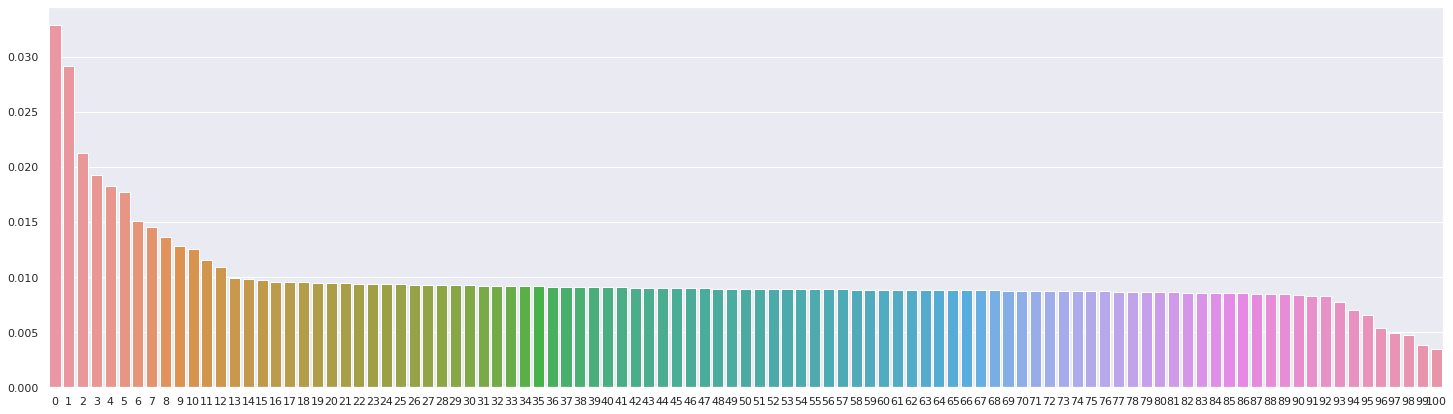

In [213]:
plt.figure(figsize = (25,7));
sns.barplot(x = np.arange(len(pca.components_)), y = pca.explained_variance_ratio_);

In [214]:
pca_X_train = pca.transform(nX_train)
pca_X_test = pca.transform(nX_test)
pca_test_X = pca.transform(ntest_X)

In [215]:
cat_pca = CatBoostClassifier(iterations=800, random_seed=1, verbose = 0)
cat_pca, acc = metrics(cat_pca, pca_X_train, y_train, pca_X_test, y_test)

train accuracy: 0.8252575844304522
test accuracy: 0.7858676053919464


In [216]:
models["cat_pca"] = cat_pca
cmp["cat_pca"] = acc

- Apply CatClassifier after PCA. No overfitting but test accuracy is low.

## Neural Network

In [135]:
def NN_metrics(model, X_train, y_train, X_test, y_test):
    acc_train = model.evaluate(X_train, y_train)
    acc_test = model.evaluate(X_test, y_test)
    return [acc_train[1], acc_test[1]]

### Round 1: basic

In [144]:
# use sigmoid as output
m1 = keras.Sequential(name = "M1")

# weight initilizers
initilizers = ['glorot_uniform', 'glorot_normal', 'he_normal']

# input layer
m1.add(keras.layers.InputLayer(input_shape = (nX_train.shape[1], ), name = "input"))
       
# hidden layers
hidden_layers = [10, 20, 4]

for i, layer in enumerate(hidden_layers):
    if not hidden_layers[i]:
        m1.add(keras.layers.Dropout(0.5, name = "dropout_" + str(i + 1)))
    else:
        m1.add(keras.layers.Dense(units = layer, activation = "relu", kernel_initializer=initilizers[2], name = "dense_" + str(i + 1)))

# output layer
m1.add(keras.layers.Dense(units = 1, activation = "sigmoid", kernel_initializer=initilizers[0], name = "output"))

# optimizers
optimizers = [
    keras.optimizers.Adam(learning_rate = 0.001,epsilon=1e-06),    # default lr=0.001, epsilon=1e-07
    keras.optimizers.SGD(learning_rate=0.01),                              # default lr = 0.01
    keras.optimizers.RMSprop(learning_rate=0.001),              # default lr=0.001, epsilon=1e-07
]

# model
m1.compile(optimizer = optimizers[0], loss = "binary_crossentropy", metrics = scorer)
history = m1.fit(x = nX_train, y = y_train, batch_size=1024, epochs=300, verbose=1, validation_split=0.1, validation_batch_size=1024)

# fit well combinations:
# RMSprop(lr = 0.0005) + layers [16] + epochs(120): accuracy: 0.8362 , val_accuracy: 0.8297

# Adam(learning_rate = 0.001,epsilon=1e-08) + layers[10] + epochs(300): accuracy: 0.8456, val_accuracy: 0.8389

# Adam(learning_rate = 0.001,epsilon=1e-06) + layers[10, 32] + epochs(300): accuracy: 0.8579, val_accuracy: 0.8497

# Adam(learning_rate = 0.001,epsilon=1e-06) + layers[10, 20, 4 or 5] + epochs(300): accuracy: 0.8625, val_accuracy: 0.8552

Epoch 1/300
62/62 [==============================] - 1s 4ms/step - loss: 0.7643 - accuracy: 0.5154 - val_loss: 0.6493 - val_accuracy: 0.7006
Epoch 2/300
62/62 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.7454 - val_loss: 0.5438 - val_accuracy: 0.7620
Epoch 3/300
62/62 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7618 - val_loss: 0.5190 - val_accuracy: 0.7649
Epoch 4/300
62/62 [==============================] - 0s 3ms/step - loss: 0.5102 - accuracy: 0.7653 - val_loss: 0.5083 - val_accuracy: 0.7655
Epoch 5/300
62/62 [==============================] - 0s 3ms/step - loss: 0.5014 - accuracy: 0.7693 - val_loss: 0.5014 - val_accuracy: 0.7696
Epoch 6/300
62/62 [==============================] - 0s 3ms/step - loss: 0.4954 - accuracy: 0.7720 - val_loss: 0.4964 - val_accuracy: 0.7749
Epoch 7/300
62/62 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.7759 - val_loss: 0.4930 - val_accuracy: 0.7786
Epoch 8/300
6

Epoch 59/300
62/62 [==============================] - 0s 4ms/step - loss: 0.3667 - accuracy: 0.8491 - val_loss: 0.3936 - val_accuracy: 0.8447
Epoch 60/300
62/62 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8492 - val_loss: 0.3912 - val_accuracy: 0.8434
Epoch 61/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3662 - accuracy: 0.8490 - val_loss: 0.3907 - val_accuracy: 0.8446
Epoch 62/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.8488 - val_loss: 0.3914 - val_accuracy: 0.8462
Epoch 63/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3655 - accuracy: 0.8495 - val_loss: 0.3905 - val_accuracy: 0.8440
Epoch 64/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3651 - accuracy: 0.8500 - val_loss: 0.3888 - val_accuracy: 0.8433
Epoch 65/300
62/62 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8494 - val_loss: 0.3907 - val_accuracy: 0.8443
Epoch 

62/62 [==============================] - 0s 3ms/step - loss: 0.3536 - accuracy: 0.8538 - val_loss: 0.3774 - val_accuracy: 0.8520
Epoch 117/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8536 - val_loss: 0.3786 - val_accuracy: 0.8526
Epoch 118/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3536 - accuracy: 0.8534 - val_loss: 0.3782 - val_accuracy: 0.8510
Epoch 119/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3532 - accuracy: 0.8537 - val_loss: 0.3784 - val_accuracy: 0.8522
Epoch 120/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3533 - accuracy: 0.8536 - val_loss: 0.3774 - val_accuracy: 0.8536
Epoch 121/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3528 - accuracy: 0.8538 - val_loss: 0.3767 - val_accuracy: 0.8515
Epoch 122/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3528 - accuracy: 0.8535 - val_loss: 0.3769 - val_accuracy: 0.8536
Epoch 123/300

62/62 [==============================] - 0s 3ms/step - loss: 0.3479 - accuracy: 0.8558 - val_loss: 0.3751 - val_accuracy: 0.8519
Epoch 174/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3482 - accuracy: 0.8560 - val_loss: 0.3772 - val_accuracy: 0.8526
Epoch 175/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3482 - accuracy: 0.8556 - val_loss: 0.3746 - val_accuracy: 0.8527
Epoch 176/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 0.8562 - val_loss: 0.3751 - val_accuracy: 0.8525
Epoch 177/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 0.8562 - val_loss: 0.3767 - val_accuracy: 0.8527
Epoch 178/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3487 - accuracy: 0.8554 - val_loss: 0.3776 - val_accuracy: 0.8526
Epoch 179/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3479 - accuracy: 0.8558 - val_loss: 0.3785 - val_accuracy: 0.8515
Epoch 180/300

62/62 [==============================] - 0s 3ms/step - loss: 0.3448 - accuracy: 0.8575 - val_loss: 0.3789 - val_accuracy: 0.8533
Epoch 231/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.8575 - val_loss: 0.3798 - val_accuracy: 0.8526
Epoch 232/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.8571 - val_loss: 0.3799 - val_accuracy: 0.8526
Epoch 233/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3451 - accuracy: 0.8574 - val_loss: 0.3784 - val_accuracy: 0.8549
Epoch 234/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.8577 - val_loss: 0.3788 - val_accuracy: 0.8537
Epoch 235/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.8574 - val_loss: 0.3784 - val_accuracy: 0.8530
Epoch 236/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3446 - accuracy: 0.8577 - val_loss: 0.3789 - val_accuracy: 0.8530
Epoch 237/300

62/62 [==============================] - 0s 3ms/step - loss: 0.3435 - accuracy: 0.8574 - val_loss: 0.3789 - val_accuracy: 0.8555
Epoch 288/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.8584 - val_loss: 0.3830 - val_accuracy: 0.8513
Epoch 289/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3440 - accuracy: 0.8577 - val_loss: 0.3797 - val_accuracy: 0.8526
Epoch 290/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.8587 - val_loss: 0.3781 - val_accuracy: 0.8535
Epoch 291/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8580 - val_loss: 0.3775 - val_accuracy: 0.8535
Epoch 292/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.8594 - val_loss: 0.3772 - val_accuracy: 0.8545
Epoch 293/300
62/62 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8589 - val_loss: 0.3799 - val_accuracy: 0.8515
Epoch 294/300

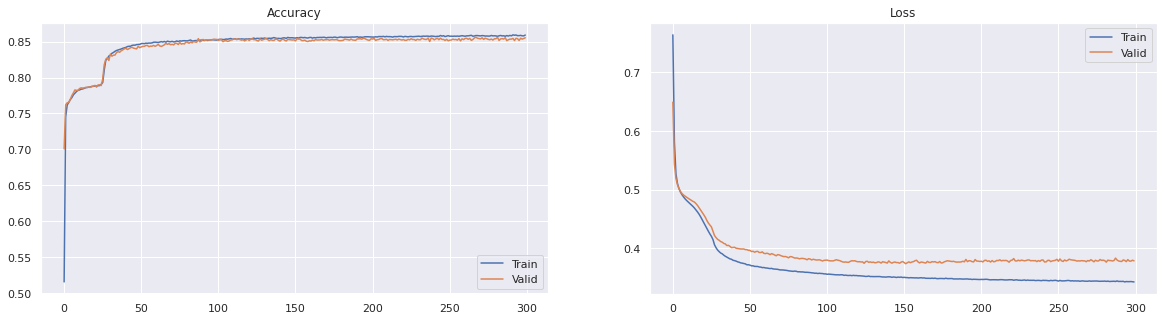

In [145]:
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.plot(history.history["accuracy"], label = "Train");
plt.plot(history.history["val_accuracy"], label = "Valid");
plt.title("Accuracy");
plt.legend(loc = "lower right");

plt.subplot(122)
plt.plot(history.history["loss"], label = "Train");
plt.plot(history.history["val_loss"], label = "Valid");
plt.title("Loss");
plt.legend(loc = "upper right");

In [146]:
acc = NN_metrics(m1, nX_train, y_train, nX_test, y_test)

728/728 [==============================] - 1s 752us/step - loss: 0.3698 - accuracy: 0.8483


In [147]:
models["nn_m1"] = m1
cmp["nn_m1"] = acc

In [148]:
m1.summary()

Model: "M1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                1150      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 84        
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 1,459
Trainable params: 1,459
Non-trainable params: 0
_________________________________________________________________


# Compare models

In [217]:
cmp.T.sort_values(by = "Test Accuracy", ascending = False)  # sort by test accuracy in descending order

,Train Accuracy,Test Accuracy
stack,0.9156,0.8814
cat_tuned,0.8873,0.8680
cat,0.8855,0.8661
xgc_tuned,0.9032,0.8655
xgc,0.8928,0.8638
adc_tuned,0.8845,0.8548
gbc_tuned,0.8709,0.8528
nn_m1,0.8595,0.8483
bgc,0.9992,0.8397
bgc_tuned,0.9997,0.8393


In [150]:
best_model = stack   # choose the best model
best_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('stackingclassifier',
                 StackingClassifier(cv=3,
                                    estimators=[('rf_tuned',
                                                 RandomForestClassifier(class_weight={0: 23.75,
                                                                                      1: 76.25},
                                                                        max_depth=13,
                                                                        max_features=0.8,
                                                                        min_impurity_decrease=0.01,
                                                                        n_estimators=180,
                                                                        n_jobs=-1,
                                                                        random_state=1)),
                                                ('bgc',
                

# Prediction

In [218]:
# for ensemble
predict = best_model.predict(test_X)

# for NN
# predict = best_model.predict(ntest_X)
# predict = np.round(predict.flatten()).astype("int32")

predict

array([1, 0, 1, ..., 0, 0, 0])

In [219]:
output["default"] = predict
output.head(10)

,default
ID,
4855329,1
66862420,0
3637416,1
53682249,0
53937165,0
1464149,1
7429943,1
10047245,1
46816125,0


In [220]:
output.shape

(39933, 1)

In [186]:
output.to_csv("cattle4_submission.csv")

# Conclusion
- 3 year term loan applicants are more likely to default.
- In terms of loan grade, Likelihood of default: A = B > C = D > F = G > E.
- Applicants with 10+ years of job experience are less likely to default.
- Applicants with home ownership of `NONE` and `OTHER` are much more likely to default.
- Applicants tagged `Source Verified` are less likely to default than the other two categories.
- Applicants using this loan for credit cards are least likely to default, while those using it for `other` purpose are most likely to default.
- State ID has the highest default rate of 100%. State ND has the lowest default rate, followed by NE, ME. Other states have default rate from 15% to 30%.
- Individual applicants are more likely to default than joint applicants.
- Defaulters have lower `loan_amount`, `debt_to_income`, `revolving_balance` and slightly lower `total_revolving_limit`.
- Applicants missing their loan payments for 30+ days in the pass 2 years for 22 times have 100% default rate, followed by those missing for 16 times. However, those missing for 11/14/15/17/18/19/21 times have 0% default rate.
- Applicants with more legal cases against them are more less likely to default.
- Defaulters pay more interest to the bank, make loan payments for a longer period, and have slightly higher `total_current_balance`.